In [1]:
import os

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image
from tqdm.notebook import tqdm, trange
import glob
import nltk
import base64
from IPython.display import Image as IImage
from IPython.display import display
import warnings
tqdm.pandas()

In [2]:
topics = {63: {'aerodynamic',
  'aircraft',
  'airplane',
  'aviation',
  'fly',
  'fuselage',
  'plane',
  'wing'},
 3: {'aircraft',
  'aviation',
  'fighter',
  'flew',
  'flight',
  'fly',
  'lindbergh',
  'pilot',
  'squadron'},
 271: {'aerial',
  'aerodrome',
  'aircraft',
  'airport',
  'airspace',
  'aviation',
  'flight',
  'fly',
  'icao',
  'licensing',
  'pilot'},
 145: {'aeroflot',
  'aeroflots',
  'aerosvit',
  'aircraft',
  'airline',
  'airport',
  'boeing',
  'flight',
  'superjet',
  'volgadnepr'},
 298: {'aircraft',
  'airline',
  'aviation',
  'corporate',
  'openairplane',
  'pilot',
  'remuneration',
  'shareholders13',
  'stakeholder'},
 11: {'airbus',
  'aircraft',
  'airline',
  'airliner',
  'airport',
  'boeing',
  'flight',
  'lufthansa',
  'passenger',
  'southwest'},
 45: {'aircraft',
  'armament',
  'bomber',
  'corsair',
  'fighter',
  'fuselage',
  'navy',
  'squadron',
  'wing'},
 201: {'aerobot',
  'aerobraking',
  'aerodynamic',
  'aeronautics',
  'aircraft',
  'balloon',
  'fly',
  'glide',
  'rocket',
  'spacecraft',
  'spaceflight'},
 35: {'1900d',
  'aircraft',
  'beech',
  'beechcraft',
  'cabin',
  'cessna',
  'engine',
  'gear',
  'skyhawk',
  'wing'},
 108: {'aircraft',
  'biplane',
  'cantilever',
  'design',
  'fuselage',
  'monoplane',
  'sesquiplane',
  'strut',
  'wing'},
 58: {'737',
  '747',
  '747400',
  '747400s',
  '7478',
  'aircraft',
  'airline',
  'airliner',
  'boeing',
  'boeings',
  'freighter'},
 144: {'1943',
  '1944',
  'aircraft',
  'armament',
  'bomber',
  'raf',
  'squadron',
  'v72',
  'vengeance'},
 157: {'aerial',
  'aircraft',
  'balloon',
  'bomber',
  'camera',
  'photographic',
  'photography',
  'reconnaissance'},
 186: {'aircraft',
  'albatros',
  'armament',
  'benz',
  'biplane',
  'diii',
  'fuselage',
  'mercedes',
  'strut',
  'wing'},
 230: {'aircraft',
  'airlift',
  'airlifters',
  'cargo',
  'carry',
  'equipment',
  'helicopter',
  'payload',
  'pylon',
  'transport'},
 159: {'aircraft',
  'beaufort',
  'beauforts',
  'fuselage',
  'pilot',
  'raf',
  'spitfire',
  'squadron',
  'supermarine'},
 220: {'911',
  'aircraft',
  'airline',
  'faa',
  'flight',
  'hijack',
  'hijacker',
  'pentagon',
  'plane',
  'tower'},
 77: {'aircraft',
  'airline',
  'airport',
  'boeing',
  'calgary',
  'fleet',
  'flight',
  'toronto',
  'vancouver',
  'westjet'},
 256: {'aircraft', 'airline', 'airport', 'code', 'digit', 'flight', 'number'},
 104: {'1916',
  'aircraft',
  'argosy',
  'biplane',
  'engine',
  'fighter',
  'fit',
  'fly',
  'raf',
  'wing'},
 86: {'aircraft',
  'airline',
  'airport',
  'airway',
  'boeing',
  'fiji',
  'flight',
  'pacific',
  'qantas',
  'sydney'},
 2: {'aircraft',
  'airline',
  'cockpit',
  'crash',
  'crashed',
  'crew',
  'investigator',
  'passenger',
  'pilot',
  'wreckage'},
 34: {'administration',
  'aircraft',
  'airline',
  'airport',
  'amend',
  'aviation',
  'federal',
  'legislation',
  'tsa'},
 247: {'aircraft',
  'cockpit',
  'control',
  'display',
  'gunner',
  'instrument',
  'panel',
  'pilot'},
 23: {'aircraft',
  'amelia',
  'aviation',
  'flew',
  'flight',
  'fly',
  'pilot',
  'woman'},
 80: {'aerodynamic',
  'aircraft',
  'flight',
  'hypersonic',
  'land',
  'lift',
  'rocket',
  'shuttle',
  'spacecraft',
  'spaceplane'},
 165: {'aircraft',
  'bluebird',
  'bomber',
  'built',
  'design',
  'fuselage',
  'hampdens',
  'patent',
  'prototype',
  'raf',
  'wing'},
 32: {'aircraft',
  'boat',
  'floatplane',
  'flyingboat',
  'naval',
  'seaplane',
  'ship'},
 319: {'aeronautical',
  'aeronautics',
  'aircraft',
  'design',
  'engineer',
  'engineering',
  'hypersonic',
  'ice',
  'langley',
  'pyrodyne',
  'rodert'},
 126: {'aircraft',
  'anxiety',
  'aviophobia',
  'circadian',
  'fatigue',
  'fear',
  'flight',
  'fly',
  'phobia',
  'pilot'},
 66: {'aircraft',
  'airport',
  'airspace',
  'atc',
  'clearance',
  'controller',
  'faa',
  'flight',
  'pilot',
  'radar'},
 225: {'aerospace',
  'airbus',
  'aircraft',
  'boeing',
  'bombardier',
  'company',
  'industry',
  'merger',
  'supplier'},
 25: {'1944',
  'aircraft',
  'bomber',
  'bombing',
  'combat',
  'fighter',
  'luftwaffe',
  'pilot',
  'raf'},
 8: {'aircraft',
  'airfield',
  'airlift',
  'deployed',
  'fly',
  'mission',
  'operational',
  'raf',
  'squadron'},
 235: {'737',
  '737700',
  '737800',
  '737ng',
  '737s',
  'aircraft',
  'airline',
  'boeing',
  'boeings',
  'fuselage',
  'southwest'},
 295: {'airasia',
  'airbus',
  'aircraft',
  'airline',
  'boeing',
  'brunei',
  'kuala',
  'lumpur',
  'malaysia',
  'malaysian'},
 227: {'aircraft',
  'airline',
  'amazon',
  'ati',
  'boeing',
  'cargo',
  'cargolux',
  'charter',
  'fleet'},
 44: {'aircraft',
  'armament',
  'bomber',
  'design',
  'engine',
  'fuselage',
  'ju',
  'luftwaffe',
  'messerschmitt',
  'wing'},
 234: {'1944',
  'aircraft',
  'bomber',
  'havilland',
  'hornet',
  'mosquito',
  'raf',
  'squadron'},
 50: {'aircraft',
  'canadian',
  'dh60',
  'dhc',
  'fly',
  'fuselage',
  'havilland',
  'moth',
  'otter'},
 251: {'aircraft',
  'airliner',
  'company',
  'il214',
  'jet',
  'mig35',
  'su35s',
  'superjet',
  'tu204',
  'uac',
  'uacs'},
 31: {'aerial',
  'aircraft',
  'dji',
  'drone',
  'reconnaissance',
  'sensor',
  'uas',
  'uav',
  'uavs',
  'unmanned'},
 10: {'aircraft',
  'airfield',
  'airline',
  'airport',
  'county',
  'facility',
  'flight',
  'runway'},
 258: {'aircraft',
  'airway',
  'cabin',
  'fairchild',
  'fuselage',
  'h45',
  'h47',
  'husky',
  'monoplane',
  'rcaf'},
 72: {'1910',
  '1942',
  '1942nd',
  'aerospace4',
  'aircraft',
  'aviation',
  'aviationrelated',
  'birmingham',
  'event',
  'huntsville',
  'year'},
 93: {'aeronautical',
  'aeronautics',
  'aerospace',
  'aircraft',
  'aviation',
  'engineer',
  'engineering',
  'flight',
  'mechanical',
  'optimization'},
 118: {'aircraft',
  'airline',
  'airway',
  'bcal',
  'bcals',
  'bua',
  'flight',
  'gatwick',
  'heathrow',
  'london'},
 19: {'aircraft', 'glide', 'glider', 'kite', 'sailplane', 'soar', 'wing'},
 139: {'a37',
  'a37b',
  'aircraft',
  'cessna',
  'navy',
  'refuel',
  't33',
  't37',
  'trainer',
  'training',
  'usaf'},
 237: {'aircraft',
  'captain',
  'copilot',
  'crew',
  'duty',
  'faa',
  'officer',
  'operate',
  'operation',
  'pilot',
  'pilotincommand'}}

In [3]:
for el in topics:
    print(el, topics[el])

63 {'airplane', 'plane', 'aerodynamic', 'fly', 'wing', 'aviation', 'fuselage', 'aircraft'}
3 {'lindbergh', 'fighter', 'fly', 'flight', 'aviation', 'squadron', 'pilot', 'flew', 'aircraft'}
271 {'licensing', 'fly', 'flight', 'icao', 'aviation', 'airspace', 'aerial', 'airport', 'aircraft', 'pilot', 'aerodrome'}
145 {'aeroflot', 'boeing', 'flight', 'volgadnepr', 'airport', 'aeroflots', 'superjet', 'airline', 'aerosvit', 'aircraft'}
298 {'stakeholder', 'shareholders13', 'aviation', 'pilot', 'openairplane', 'airline', 'aircraft', 'remuneration', 'corporate'}
11 {'boeing', 'flight', 'lufthansa', 'airline', 'airliner', 'airport', 'passenger', 'airbus', 'southwest', 'aircraft'}
45 {'corsair', 'navy', 'armament', 'fighter', 'wing', 'fuselage', 'squadron', 'bomber', 'aircraft'}
201 {'aerodynamic', 'fly', 'spaceflight', 'balloon', 'rocket', 'aerobot', 'aerobraking', 'aeronautics', 'glide', 'spacecraft', 'aircraft'}
35 {'wing', '1900d', 'skyhawk', 'gear', 'cessna', 'cabin', 'beechcraft', 'beech', '

### change d_path to your local address

In [4]:
d_path = '/raid/AISSEL/htest/datasets/av_data/ftest/'
df_after = pd.read_pickle(f'{d_path}/df_av_test.pk')
df_after

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics
0,1,1,Drone Training 2 Day Our Location,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.471964,0.258764,a
1,4,4,Firefighting Drones,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.512088,0.489315,a
2,27,27,DJI mavic 2 pro in flight,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.506123,0.303162,a
3,51,51,A small UAS is seen flying during at the US Ar...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.456664,0.440849,a
4,102,102,Ruko F11 GIM2 Drone with Camera for Adults 4K ...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.425304,0.273581,a
...,...,...,...,...,...,...,...,...,...
701,1931,1931,In our globalized world aviation increasingly ...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.265668,0.481348,j
702,1947,1947,Lufthansa Business Class on longhaul aircraft,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.333263,0.526307,j
703,1969,1969,The Boeing 7478 has inherited the good looks o...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.309636,0.431361,j
704,1979,1979,911 Attacks Pentagon,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.655778,0.354867,j


In [5]:
df_before = pd.read_pickle(f'{d_path}/df_av_test.pk')
df_before

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics
0,1,1,Drone Training 2 Day Our Location,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.471964,0.258764,a
1,4,4,Firefighting Drones,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.512088,0.489315,a
2,27,27,DJI mavic 2 pro in flight,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.506123,0.303162,a
3,51,51,A small UAS is seen flying during at the US Ar...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.456664,0.440849,a
4,102,102,Ruko F11 GIM2 Drone with Camera for Adults 4K ...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.425304,0.273581,a
...,...,...,...,...,...,...,...,...,...
701,1931,1931,In our globalized world aviation increasingly ...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.265668,0.481348,j
702,1947,1947,Lufthansa Business Class on longhaul aircraft,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.333263,0.526307,j
703,1969,1969,The Boeing 7478 has inherited the good looks o...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.309636,0.431361,j
704,1979,1979,911 Attacks Pentagon,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.655778,0.354867,j


In [6]:
def get_image(idx ,df):
    image_64_decode = base64.b64decode(df.at[idx,'image']) 
    image_result = open('deer_decode.jpg', 'wb')
    image_result.write(image_64_decode)

In [7]:
# cols = ['uniq_id', 'image_id', 'caption', 'labels', 'image']
# f_path = '/raid/AISSEL/htest/datasets/caption_data/caption_stage1_train.tsv'
# df_1 = pd.read_csv(f'{f_path}', sep='\t', names=cols)

In [8]:
def get_cap(idx):
    image_64_decode = base64.b64decode(df_before.at[idx,'image']) 
    image_result = open('deer_decode.jpg', 'wb')
    image_result.write(image_64_decode)
    bf = df_before.at[idx,'caption']
    af = df_before.at[idx,'caption']
    return bf, af

In [9]:
bf, af = get_cap(100)

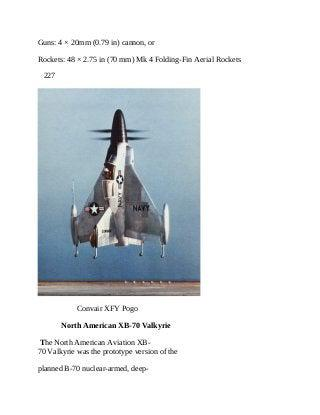

In [10]:
IImage(filename='deer_decode.jpg', width = 300, height = 200) 

## change these variable to your range
    1. htest: 0 to 218
    2. Fatemeh: 218 to 434
    3. Darin: 434 to 650


In [11]:

data_length = 706

In [12]:
d = [None] * 706

In [13]:
d[0] = {'uavs': 0, 'uav':0, 'aircraft': 0, 'reconnaissance': 0, 'uas':0, 
         'aerial':0, 'dji':0, 'sensor':0, 'unmanned':0, 'drone':0}
d[1] = {'aircraft': 0, 'drone':0, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[2] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[3] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[4] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[5] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[6] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[7] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[8] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[9] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}

In [14]:
d[10] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[11] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[12] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[13] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[14] = {'aircraft': 0, 'drone':1, 'sensor':0, 'uav':1, 
        'reconnaissance':0, 'uavs':1, 'unmanned':1, 'aerial':0, 'uas':1, 'dji':0}
d[15] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}
d[16] = {'aircraft': 0, 'sailplane':0, 'kite':1, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[17] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}
d[18] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':0, 'glider':0, 'wing': 1}
d[19] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}

In [15]:
d[20] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[21] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[22] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[23] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[24] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':1, 'glider':1, 'wing': 1}
d[25] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[26] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[27] = {'aircraft': 1, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}
d[28] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[29] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':0, 'glider':0, 'wing': 1}

In [16]:
d[30] = {'aircraft': 0, 'sailplane':0, 'kite':1, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 0}
d[31] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':0, 'glider':0, 'wing': 1}
d[32] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':0, 'glider':0, 'wing': 1}
d[33] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[34] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[35] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[36] = {'aircraft': 1, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}
d[37] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[38] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[39] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}

In [17]:
d[40] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[41] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[42] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[43] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[44] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[45] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[46] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[47] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[49] = {'aircraft': 1, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}

In [18]:
d[50] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[51] = {'aircraft': 1, 'sailplane':0, 'kite':0, 'soar':0, 
         'glide':0, 'glider':0, 'wing': 0}
d[52] = {'aircraft': 0, 'sailplane':0, 'kite':0, 'soar':0, 
         'glide':1, 'glider':1, 'wing': 0}
d[53] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':1, 'glider':1, 'wing': 1}
d[54] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':0, 
         'glide':1, 'glider':1, 'wing': 1}
d[55] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[56] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[57] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[58] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[59] = {'aircraft': 1, 'sailplane':0, 'kite':0, 'soar':1, 
         'glide':0, 'glider':0, 'wing': 1}

In [19]:
d[60] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 1}
d[61] = {'aircraft': 1, 'sailplane':1, 'kite':0, 'soar':1, 
         'glide':1, 'glider':1, 'wing': 0}
d[62] = {'seaplane':0, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':0, 'flyingboat':1}
d[63] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[64] = {'seaplane':0, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[65] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[66] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[67] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[68] = {'seaplane':0, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':0, 'flyingboat':0}
d[69] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}

In [20]:
d[70] = {'seaplane':1, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':1, 'flyingboat':1}
d[71] = {'seaplane':0, 'aircraft':1, 'naval':1, 'ship':1, 
         'boat':0, 'floatplane':0, 'flyingboat':0}
d[72] = {'seaplane':0, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':0, 'flyingboat':0}
d[73] = {'seaplane':0, 'aircraft':1, 'naval':0, 'ship':0, 
         'boat':0, 'floatplane':0, 'flyingboat':0}
d[74] = {'balloon':0, 'bomber':0, 'aircraft':0, 'photographic':1, 
         'reconnaissance':0, 'photography':1, 'aerial':1, 'camera':0}
d[75] = {'balloon':0, 'bomber':1, 'aircraft':1, 'photographic':0, 
         'reconnaissance':1, 'photography':0, 'aerial':0, 'camera':0}
d[76] = {'aircraft':1, 'carry':1, 'helicopter':0, 'pylon':0, 'airlifters':0, 
         'payload':0, 'transport':1, 'airlift':0, 'equipment':1, 'cargo':0}
d[77] = {'aircraft':0, 'carry':1, 'helicopter':0, 'pylon':0, 'airlifters':0, 
         'payload':0, 'transport':1, 'airlift':0, 'equipment':1, 'cargo':0}
d[78] = {'aircraft':1, 'carry':0, 'helicopter':0, 'pylon':0, 'airlifters':0, 
         'payload':0, 'transport':0, 'airlift':0, 'equipment':1, 'cargo':0}
d[79] = {'aircraft':1, 'carry':0, 'helicopter':0, 'pylon':0, 'airlifters':0, 
         'payload':0, 'transport':0, 'airlift':0, 'equipment':1, 'cargo':0}

In [21]:
d[80] = {'aircraft':1, 'carry':0, 'helicopter':0, 'pylon':0, 'airlifters':0, 'payload':0, 
         'transport':0, 'airlift':0, 'equipment':0, 'cargo':0}
d[81] = {'aircraft':1, 'carry':0, 'helicopter':0, 'pylon':1, 'airlifters':1, 'payload':0, 
         'transport':0, 'airlift':1, 'equipment':0, 'cargo':0}
d[82] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[83] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[84] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':0}
d[85] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':0,
         'plane':1, 'wing':1}
d[86] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':0,
         'plane':1, 'wing':1}
d[87] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':0,
         'plane':1, 'wing':1}
d[88] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':0,
         'plane':1, 'wing':1}
d[89] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':0,
         'plane':1, 'wing':1}

In [22]:
d[90] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[91] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[92] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':0, 'fuselage':0,
         'plane':1, 'wing':0}
d[93] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':0, 'fuselage':1,
         'plane':1, 'wing':1}
d[94] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':0, 'fuselage':1,
         'plane':1, 'wing':1}
d[95] = {'aircraft':1, 'fly':0, 'aviation':1, 'airplane':1, 'aerodynamic':0, 'fuselage':1,
         'plane':1, 'wing':1}
d[96] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[97] = {'aircraft':1, 'fly':1, 'aviation':1, 'airplane':1, 'aerodynamic':1, 'fuselage':1,
         'plane':1, 'wing':1}
d[98] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':1, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':1, 'langley':0, 'aeronautics':1}
d[99] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}

In [23]:
d[100] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':1, 'langley':0, 'aeronautics':1}
d[101] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':1, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[102] = {'aircraft':0, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':0}
d[103] = {'aircraft':0, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':0}
d[104] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[105] = {'aircraft':0, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':0}
d[106] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[107] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':1, 'langley':0, 'aeronautics':1}
d[108] = {'aircraft':0, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':0}
d[109] = {'aircraft':1, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':0}

In [24]:
d[110] = {'aircraft':1, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[111] = {'aircraft':1, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[112] = {'aircraft':1, 'ice':0, 'aeronautical':0, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':0, 'engineering':0, 'hypersonic':0, 'langley':0, 'aeronautics':1}
d[113] = {'aircraft':1, 'ice':0, 'aeronautical':1, 'pyrodyne':0, 'rodert':0, 'engineer':0, 
         'design':1, 'engineering':0, 'hypersonic':1, 'langley':0, 'aeronautics':1}
d[114] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':1, 'flight':1, 'spaceplane':0}
d[115] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':0, 'flight':1, 'spaceplane':0}
d[116] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':1, 'flight':1, 'spaceplane':1}
d[117] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':1, 'flight':0, 'spaceplane':1}
d[118] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':1, 'flight':0, 'spaceplane':1}
d[119] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':1, 'flight':1, 'spaceplane':0}


In [25]:
d[120] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':1, 'flight':0, 'spaceplane':1}
d[121] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':1, 'flight':1, 'spaceplane':0}
d[122] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[123] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':1, 'flight':0, 'spaceplane':0}
d[124] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[125] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':0, 'flight':1, 'spaceplane':0}
d[126] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[127] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[128] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':0, 'flight':0, 'spaceplane':0}
d[129] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}

In [26]:
d[130] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':0, 'flight':1, 'spaceplane':0}
d[131] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[132] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':0, 'flight':1, 'spaceplane':0}
d[133] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':0, 'flight':1, 'spaceplane':1}
d[134] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':1, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':0, 'flight':0, 'spaceplane':1}
d[135] = {'rocket':0, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[136] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[137] = {'rocket':0, 'aircraft':0, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':0, 
          'hypersonic':0, 'land':0, 'flight':0, 'spaceplane':0}
d[138] = {'rocket':1, 'aircraft':1, 'lift':0, 'spacecraft':0, 'shuttle':0, 'aerodynamic':1, 
          'hypersonic':1, 'land':0, 'flight':1, 'spaceplane':0}
d[139] = {'bomber':0, 'aircraft':1, 'v72':1, 'squadron':0, 'vengeance':0, 
          'raf':0, '1943':0, '1944':0, 'armament':0}

In [27]:
d[140] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':0, 'vengeance':1, 
          'raf':1, '1943':1, '1944':1, 'armament':0}
d[141] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':0, 'vengeance':0, 
          'raf':1, '1943':1, '1944':1, 'armament':0}
d[142] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':1, 'vengeance':0, 
          'raf':1, '1943':1, '1944':1, 'armament':1}
d[143] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':0, 'vengeance':0, 
          'raf':1, '1943':0, '1944':0, 'armament':1}
d[144] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':0, 'vengeance':0, 
          'raf':1, '1943':0, '1944':0, 'armament':0}
d[145] = {'bomber':1, 'aircraft':1, 'v72':0, 'squadron':0, 'vengeance':0, 
          'raf':1, '1943':0, '1944':0, 'armament':0}
d[146] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':1, 'raf':0, 
          'biplane':0, 'engine':0, 'fighter':0, 'wing':1}
d[147] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':1, 'engine':0, 'fighter':1, 'wing':1}
d[148] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':1, 'raf':0, 
          'biplane':0, 'engine':0, 'fighter':0, 'wing':1}
d[149] = {'1916':0, 'aircraft':0, 'fit':0, 'fly':0, 'argosy':0, 'raf':0, 
          'biplane':0, 'engine':0, 'fighter':0, 'wing':0}

In [28]:
d[150] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':1, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[151] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[152] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[153] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[154] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':1, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[155] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[156] = {'1916':1, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':1, 'engine':0, 'fighter':1, 'wing':1}
d[157] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':1, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[158] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}
d[159] = {'1916':0, 'aircraft':1, 'fit':0, 'fly':0, 'argosy':0, 'raf':1, 
          'biplane':0, 'engine':0, 'fighter':1, 'wing':1}

In [29]:
d[160] = {'aircraft':0, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':0}
d[161] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':0}
d[162] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':0}
d[163] = {'aircraft':1, 'gear':0, 'beech':1, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':0, 'engine':0, 'wing':1}
d[164] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':0}
d[165] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':0, 'engine':0, 'wing':1}
d[166] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':0, 'engine':0, 'wing':1}
d[167] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':0, 'engine':0, 'wing':0}
d[168] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':0, 'engine':0, 'wing':1}
d[169] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':0, 'engine':0, 'wing':1}

In [30]:
d[170] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[171] = {'aircraft':1, 'gear':0, 'beech':1, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':0, 'engine':0, 'wing':1}
d[172] = {'aircraft':1, 'gear':0, 'beech':1, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[173] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':1, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[174] = {'aircraft':1, 'gear':0, 'beech':1, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[175] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[176] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':1, 'wing':1}
d[177] = {'aircraft':1, 'gear':0, 'beech':1, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[178] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':0}
d[179] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}

In [31]:
d[180] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[181] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[182] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[183] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[184] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[185] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[186] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[187] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':0, 
          'skyhawk':0, 'beechcraft':0, 'cabin':1, 'engine':0, 'wing':1}
d[188] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}
d[189] = {'aircraft':1, 'gear':0, 'beech':0, '1900d':0, 'cessna':1, 
          'skyhawk':0, 'beechcraft':1, 'cabin':1, 'engine':0, 'wing':1}

In [32]:
d[190] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':1, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[191] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':1, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[192] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[193] = {'bomber':1, 'aircraft':1, 'design':0, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[194] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':1, 'luftwaffe':1}
d[195] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[196] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':1, 'luftwaffe':1}
d[197] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[198] = {'bomber':1, 'aircraft':1, 'design':0, 'messerschmitt':0, 'ju':0, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':0}
d[199] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}

In [33]:
d[200] = {'bomber':1, 'aircraft':1, 'design':1, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[201] = {'bomber':1, 'aircraft':1, 'design':0, 'messerschmitt':0, 'ju':1, 
          'engine':0, 'fuselage':1, 'wing':1, 'armament':0, 'luftwaffe':1}
d[202] = {'bomber':1, 'aircraft':1, 'bluebird':1, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[203] = {'bomber':1, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[204] = {'bomber':1, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[205] = {'bomber':1, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[206] = {'bomber':0, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':0, 'design':0, 'fuselage':0, 'wing':1}
d[207] = {'bomber':0, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':0, 'design':0, 'fuselage':1, 'wing':1}
d[208] = {'bomber':1, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[209] = {'bomber':1, 'aircraft':1, 'bluebird':0, 'hampdens':0, 'prototype':0,
          'built':0, 'patent':0, 'raf':1, 'design':0, 'fuselage':1, 'wing':1}
d[210] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}
d[211] = {'diii':0, 'aircraft':0, 'strut':0, 'mercedes':0, 'biplane':0, 
          'fuselage':0, 'benz':0, 'albatros':0, 'wing':0, 'armament':0}
d[212] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}
d[213] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}
d[214] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}
d[215] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}
d[216] = {'diii':0, 'aircraft':1, 'strut':0, 'mercedes':0, 'biplane':0, 
          'fuselage':0, 'benz':0, 'albatros':0, 'wing':0, 'armament':0}
d[217] = {'diii':1, 'aircraft':1, 'strut':1, 'mercedes':0, 'biplane':1, 
          'fuselage':1, 'benz':0, 'albatros':1, 'wing':1, 'armament':0}

In [34]:
d[433] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':1, 'boeing':1}
d[432] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':0, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[431] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[430] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':1, 'boeing':1}
d[429] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[428] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':1, 'boeing':1}
d[427] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':1, 'boeing':1}
d[426] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':0, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[425] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[424] =  {'fleet':0, 'westjet':0, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':0, 'aircraft':0, 'calgary':0, 'boeing':0}
d[423] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':0, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':0, 'boeing':1}
d[422] =  {'fleet':0, 'westjet':1, 'vancouver':0, 'flight':1, 'airport':1, 
           'toronto':0, 'airline':1, 'aircraft':1, 'calgary':1, 'boeing':1}
d[421] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[420] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[419] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[418] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':0}
d[417] =  {'southwest':1, 'lufthansa':1, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[416] =  {'southwest':1, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':1, 'aircraft':1, 'passenger':0, 'boeing':1}
d[415] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[414] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':1, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':0}
d[413] =  {'southwest':1, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[412] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':1, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':0}
d[411] =  {'southwest':0, 'lufthansa':1, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[410] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':0, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[409] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[408] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[407] =  {'southwest':0, 'lufthansa':1, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':1, 'aircraft':1, 'passenger':1, 'boeing':1}
d[406] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':1, 
           'airbus':0, 'airline':1, 'aircraft':1, 'passenger':0, 'boeing':1}
d[405] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':0, 'airport':1, 
           'airbus':0, 'airline':1, 'aircraft':1, 'passenger':0, 'boeing':1}
d[404] =  {'southwest':1, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[403] =  {'southwest':1, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[402] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':0, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':1, 'boeing':0}
d[401] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':0}
d[400] =  {'southwest':0, 'lufthansa':1, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[399] =  {'southwest':0, 'lufthansa':1, 'airliner':0, 'flight':1, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[398] =  {'southwest':0, 'lufthansa':1, 'airliner':0, 'flight':0, 'airport':1, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[397] =  {'southwest':0, 'lufthansa':0, 'airliner':0, 'flight':0, 'airport':0, 
           'airbus':0, 'airline':0, 'aircraft':1, 'passenger':0, 'boeing':1}
d[396] =  {'tsa':0, 'aviation':1, 'airport':0, 'airline':0, 'aircraft':1, 
           'administration':0, 'federal':0, 'amend':0, 'legislation':0}
d[395] =  {'tsa':1, 'aviation':1, 'airport':0, 'airline':0, 'aircraft':1, 
           'administration':0, 'federal':0, 'amend':0, 'legislation':0}
d[394] =  {'tsa':1, 'aviation':1, 'airport':0, 'airline':0, 'aircraft':1, 
           'administration':0, 'federal':0, 'amend':0, 'legislation':0}
d[393] =  {'tsa':1, 'aviation':1, 'airport':0, 'airline':0, 'aircraft':1, 
           'administration':0, 'federal':0, 'amend':0, 'legislation':0}
d[392] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':1}
d[391] =  {'airline':0, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':1}
d[390] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':1}
d[389] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':0}
d[388] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':0}
d[387] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':0}
d[386] =  {'airline':1, 'aircraft':1, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':0}
d[385] =  {'airline':1, 'aircraft':0, 'code':0, 'digit':0, 
           'number':0, 'flight':1, 'airport':0}
d[384] = {'aeroflot':1, 'volgadnepr':0, 'airport':1, 'flight':1, 'airline':1, 
          'aircraft':1, 'superjet':1, 'aeroflots':0, 'aerosvit':0, 'boeing':0}
d[383] = {'il214':0, 'tu204':1, 'company':1, 'uac':1, 'airliner':1, 'mig35':0, 
          'aircraft':1, 'su35s':0, 'superjet':1, 'jet':0, 'uacs':1}
d[382] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':1, 'trainer':0}
d[381] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':1, 'trainer':0}
d[380] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':0, 'trainer':0}
d[379] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':1, 'trainer':0}
d[378] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':0, 'trainer':0}
d[377] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':1, 'a37':1, 'cessna':0, 'trainer':0}
d[376] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':1, 'trainer':0}
d[375] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':0, 'trainer':0}
d[374] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':1, 'a37':1, 'cessna':0, 'trainer':0}
d[373] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':0, 'trainer':0}
d[372] = {'a37b':1, 'usaf':1, 't33':1, 'training':0, 'refuel':0, 't37':1, 
          'aircraft':1, 'navy':0, 'a37':1, 'cessna':0, 'trainer':0}
d[371] = {'h45':1, 'fuselage':1, 'airway':0, 'aircraft':1, 'fairchild':0, 
          'rcaf':0, 'cabin':0, 'monoplane':0, 'husky':0, 'h47':0}
d[370] = {'engineer':0, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[369] = {'engineer':1, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[368] = {'engineer':0, 'optimization':0, 'aviation':1, 'aerospace':0, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':0, 'flight':0, 'aeronautical':0}
d[367] = {'engineer':0, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':1, 'aeronautical':1}
d[366] = {'engineer':1, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[365] = {'engineer':0, 'optimization':1, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[364] = {'engineer':0, 'optimization':1, 'aviation':1, 'aerospace':1, 'aircraft':1, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[363] = {'engineer':0, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':0, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[362] = {'engineer':0, 'optimization':0, 'aviation':1, 'aerospace':1, 'aircraft':0, 
          'engineering':1, 'mechanical':1, 'aeronautics':1, 'flight':0, 'aeronautical':1}
d[361] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':1, 'ati':0}
d[360] = {'fleet':0, 'cargo':1, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':1, 'boeing':0, 'ati':0}
d[359] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[358] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[357] = {'fleet':0, 'cargo':1, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[356] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[355] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[354] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[353] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[352] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[351] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[350] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[349] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[348] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[347] = {'fleet':0, 'cargo':1, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[346] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[345] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[344] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[343] = {'fleet':0, 'cargo':1, 'charter':0, 'amazon':0, 'airline':1, 
          'aircraft':1, 'cargolux':0, 'boeing':0, 'ati':0}
d[342] = {'fleet':0, 'cargo':0, 'charter':0, 'amazon':0, 'airline':0, 
          'aircraft':0, 'cargolux':0, 'boeing':0, 'ati':0}
d[341] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':1}
d[340] = {'industry':0, 'merger':0, 'company':0, 'supplier':1, 'airbus':0, 
          'aerospace':0, 'aircraft':1, 'bombardier':0, 'boeing':1}
d[339] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':1}
d[338] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':1}
d[337] = {'industry':0, 'merger':0, 'company':0, 'supplier':0, 'airbus':0, 
          'aerospace':0, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[336] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':0, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[335] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':1, 
          'aerospace':0, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[334] = {'industry':1, 'merger':0, 'company':0, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[333] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[332] = {'industry':0, 'merger':0, 'company':1, 'supplier':0, 'airbus':1, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[331] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':1, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[330] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':1, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[329] = {'industry':1, 'merger':0, 'company':1, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':0}
d[328] = {'industry':0, 'merger':0, 'company':0, 'supplier':0, 'airbus':0, 
          'aerospace':1, 'aircraft':1, 'bombardier':0, 'boeing':1}
d[327] = {'737s':0, 'southwest':0, 'fuselage':0, 'boeings':0, '737ng':0, '737800':0, 
          '737700':0, 'aircraft':1, '737':0, 'airline':0, 'boeing':0}
d[326] = {'737s':1, 'southwest':1, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[325] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[324] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[323] = {'737s':1, 'southwest':1, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[322] = {'737s':1, 'southwest':1, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[321] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[320] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[319] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[318] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[317] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[316] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[315] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[314] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[313] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[312] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[311] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[310] = {'737s':1, 'southwest':1, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[309] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[308] = {'737s':1, 'southwest':1, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[307] = {'737s':1, 'southwest':0, 'fuselage':0, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':0, 'boeing':0}
d[306] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[305] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[304] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':1, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':1}
d[303] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[302] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[301] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[300] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[299] = {'737s':1, 'southwest':0, 'fuselage':1, 'boeings':0, '737ng':1, '737800':1, 
          '737700':1, 'aircraft':1, '737':1, 'airline':1, 'boeing':0}
d[298] = {'havilland':1, 'hornet':0, '1944':0, 'raf':1, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':1}
d[297] = {'havilland':1, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':1, 'bomber':1}
d[296] = {'havilland':1, 'hornet':0, '1944':0, 'raf':1, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[295] = {'havilland':1, 'hornet':0, '1944':0, 'raf':1, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[294] = {'havilland':1, 'hornet':0, '1944':0, 'raf':1, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[293] = {'havilland':1, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':0, 'squadron':0, 'bomber':0}
d[292] = {'havilland':1, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[291] = {'havilland':0, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[290] = {'havilland':0, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[289] = {'havilland':1, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[288] = {'havilland':1, 'hornet':0, '1944':0, 'raf':0, 'aircraft':1, 
          'mosquito':1, 'squadron':0, 'bomber':0}
d[287] = {'fly':1, 'otter':1, 'havilland':0, 'fuselage':1, 'moth':0, 
          'aircraft':1, 'dhc':0, 'canadian':0, 'dh60':0}
d[286] = {'fly':1, 'otter':1, 'havilland':0, 'fuselage':1, 'moth':1, 
          'aircraft':1, 'dhc':0, 'canadian':0, 'dh60':0}
d[285] = {'fly':0, 'otter':0, 'havilland':0, 'fuselage':1, 'moth':1, 
          'aircraft':1, 'dhc':1, 'canadian':0, 'dh60':1}
d[284] = {'fly':0, 'otter':1, 'havilland':1, 'fuselage':1, 'moth':1, 
          'aircraft':1, 'dhc':1, 'canadian':0, 'dh60':1}
d[283] =  {'strut':1, 'design':0, 'cantilever':0, 'fuselage':1, 'wing':1,
           'biplane':0, 'aircraft':1, 'monoplane':1, 'sesquiplane':0}
d[282] =  {'strut':1, 'design':1, 'cantilever':1, 'fuselage':1, 'wing':1,
           'biplane':1, 'aircraft':1, 'monoplane':0, 'sesquiplane':1}
d[281] =  {'strut':0, 'design':1, 'cantilever':0, 'fuselage':0, 'wing':0,
           'biplane':0, 'aircraft':0, 'monoplane':0, 'sesquiplane':0}
d[280] =  {'strut':0, 'design':1, 'cantilever':0, 'fuselage':0, 'wing':0,
           'biplane':0, 'aircraft':1, 'monoplane':0, 'sesquiplane':0}
d[279] =  {'strut':0, 'design':0, 'cantilever':0, 'fuselage':0, 'wing':0,
           'biplane':0, 'aircraft':1, 'monoplane':0, 'sesquiplane':0}
d[278] =  {'strut':0, 'design':1, 'cantilever':0, 'fuselage':0, 'wing':1,
           'biplane':1, 'aircraft':0, 'monoplane':0, 'sesquiplane':0}
d[277] =  {'strut':1, 'design':0, 'cantilever':1, 'fuselage':1, 'wing':1,
           'biplane':1, 'aircraft':1, 'monoplane':0, 'sesquiplane':1}
d[276] =  {'supermarine':1, 'spitfire':1, 'beaufort':0, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':0, 'squadron':0, 'pilot':1}
d[275] =  {'supermarine':0, 'spitfire':1, 'beaufort':0, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':0, 'squadron':1, 'pilot':0}
d[274] =  {'supermarine':0, 'spitfire':1, 'beaufort':0, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':0, 'squadron':0, 'pilot':0}
d[273] =  {'supermarine':0, 'spitfire':1, 'beaufort':1, 'fuselage':1, 
           'raf':0, 'aircraft':1, 'beauforts':1, 'squadron':0, 'pilot':0}
d[272] =  {'supermarine':0, 'spitfire':1, 'beaufort':1, 'fuselage':1, 
           'raf':0, 'aircraft':1, 'beauforts':1, 'squadron':0, 'pilot':0}
d[271] =  {'supermarine':1, 'spitfire':1, 'beaufort':1, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':1, 'squadron':0, 'pilot':0}
d[270] =  {'supermarine':1, 'spitfire':1, 'beaufort':1, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':1, 'squadron':0, 'pilot':1}
d[269] =  {'supermarine':1, 'spitfire':1, 'beaufort':1, 'fuselage':1, 
           'raf':1, 'aircraft':1, 'beauforts':1, 'squadron':0, 'pilot':0}
d[268] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[267] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[266] =  {'combat':0, '1944':0, 'raf':1, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':1, 'bomber':0, 'fighter':0}
d[265] =  {'combat':0, '1944':0, 'raf':1, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':1, 'bomber':0, 'fighter':0}
d[264] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[263] =  {'combat':1, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':1, 'fighter':1}
d[262] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[261] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':1, 'aircraft':1, 
           'bombing':0, 'pilot':1, 'bomber':0, 'fighter':0}
d[260] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[259] =  {'combat':0, '1944':0, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':1, 'bomber':0, 'fighter':0}
d[258] =  {'combat':0, '1944':1, 'raf':0, 'luftwaffe':0, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[257] =  {'combat':1, '1944':0, 'raf':1, 'luftwaffe':1, 'aircraft':1, 
           'bombing':0, 'pilot':0, 'bomber':0, 'fighter':0}
d[256] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':1, 'deployed':1}
d[255] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':0}
d[254] =  {'fly':1, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':0}
d[253] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':0}
d[252] =  {'fly':0, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}
d[251] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':1, 'deployed':0}
d[250] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':2, 'squadron':1, 'deployed':0}
d[249] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':1,
           'aircraft':1, 'airfield':0, 'squadron':1, 'deployed':1}
d[248] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':1, 'deployed':1}
d[247] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':0}
d[246] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':1}
d[245] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':1, 'deployed':1}
d[244] =  {'fly':1, 'airlift':1, 'operational':1, 'mission':1, 'raf':1,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':1}
d[243] =  {'fly':1, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}

In [35]:
d[218] =  {'strut':0, 'albatros':0, 'armament':0, 'fuselage':0, 'mercedes':0, 
           'wing':0, 'biplane':0, 'aircraft':0, 'diii':0, 'benz':0}
d[219] =  {'strut':1, 'albatros':1, 'armament':0, 'fuselage':1, 'mercedes':0, 
           'wing':1, 'biplane':1, 'aircraft':1, 'diii':1, 'benz':0}
d[220] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':1,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':1}
d[221] =  {'fly':1, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':0}
d[222] =  {'fly':1, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':1, 'deployed':0}
d[223] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':1}
d[224] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':0}
d[225] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':1}
d[226] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':1}
d[227] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':1}
d[228] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}
d[229] =  {'fly':0, 'airlift':0, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':0, 'airfield':0, 'squadron':0, 'deployed':1}
d[230] =  {'fly':1, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':1}
d[231] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':1,
           'aircraft':1, 'airfield':0, 'squadron':1, 'deployed':1}
d[232] =  {'fly':1, 'airlift':0, 'operational':1, 'mission':1, 'raf':1,
           'aircraft':1, 'airfield':0, 'squadron':1, 'deployed':1}
d[233] =  {'fly':0, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':1}
d[234] =  {'fly':1, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':1}
d[235] =  {'fly':0, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':0}
d[236] =  {'fly':0, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}
d[237] =  {'fly':0, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}
d[238] =  {'fly':0, 'airlift':1, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':0}
d[239] =  {'fly':0, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':1, 'deployed':1}
d[240] =  {'fly':0, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':1, 'squadron':0, 'deployed':1}
d[241] =  {'fly':0, 'airlift':0, 'operational':0, 'mission':0, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':0}
d[242] =  {'fly':1, 'airlift':1, 'operational':1, 'mission':1, 'raf':0,
           'aircraft':1, 'airfield':0, 'squadron':0, 'deployed':1}

In [39]:
d[434] = {'calgary': 1, 'airline': 0, 'toronto': 0, 'boeing': 1, 'flight': 0, 'fleet': 1, 'vancouver': 0, 'westjet': 1, 'airport': 1, 'aircraft': 1}

d[435] = {'calgary': 0, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 1, 'fleet': 0, 'vancouver': 0, 'westjet': 1, 'airport': 0, 'aircraft': 1}

d[436] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 0, 'fleet': 1, 'vancouver': 0, 'westjet': 1, 'airport': 1, 'aircraft': 1}

d[437] = {'calgary': 0, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 0, 'fleet': 1, 'vancouver': 0, 'westjet': 0, 'airport': 1, 'aircraft': 1}

d[438] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 1, 'fleet': 0, 'vancouver': 0, 'westjet': 0, 'airport': 1, 'aircraft': 1}

d[439] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 0, 'fleet': 1, 'vancouver': 0, 'westjet': 0, 'airport': 1, 'aircraft': 1}

d[440] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 0, 'fleet': 0, 'vancouver': 0, 'westjet': 1, 'airport': 1, 'aircraft': 1}

d[441] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 1, 'fleet': 0, 'vancouver': 0, 'westjet': 1, 'airport': 1, 'aircraft': 1}

d[442] = {'calgary': 0, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 1, 'fleet': 0, 'vancouver': 0, 'westjet': 1, 'airport': 0, 'aircraft': 1}

d[443] = {'calgary': 1, 'airline': 1, 'toronto': 0, 'boeing': 1, 'flight': 1, 'fleet': 0, 'vancouver': 0, 'westjet': 1, 'airport': 1, 'aircraft': 1}

d[444] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[445] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[446] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[447] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[448] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[449] = {'pacific': 0, 'airline': 1, 'boeing': 0, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 0, 'sydney': 1, 'aircraft': 0}

d[450] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 1, 'airport': 1, 'sydney': 0, 'aircraft': 1}

d[451] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[452] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[453] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 1, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[454] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[455] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 1, 'sydney': 0, 'aircraft': 1}

d[456] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 1, 'airport': 1, 'sydney': 0, 'aircraft': 1}

d[457] = {'pacific': 1, 'airline': 1, 'boeing': 0, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 1, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[458] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 0, 'qantas': 1, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[459] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[460] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[461] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[462] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[463] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[464] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[465] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[466] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[467] = {'pacific': 0, 'airline': 1, 'boeing': 0, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[468] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 1, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[469] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[470] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport':1, 'sydney': 1, 'aircraft': 1}

d[471] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[472] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[473] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji':0, 'airport': 1, 'sydney':0, 'aircraft': 1}

d[474] = {'pacific': 1, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[475] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 0, 'sydney': 0, 'aircraft': 1}

d[476] = {'pacific': 1, 'airline': 1, 'boeing': 1, 'flight': 1, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 1, 'sydney': 0, 'aircraft': 1}

d[477] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 1, 'fiji': 0, 'airport': 1, 'sydney': 1, 'aircraft': 1}

d[478] = {'pacific': 0, 'airline': 1, 'boeing': 1, 'flight': 0, 'airway': 1, 'qantas': 0, 'fiji': 0, 'airport': 1, 'sydney': 0, 'aircraft': 1}

d[479] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 1, 'airport': 1, 'county': 1, 'aircraft': 1}

d[480] = {'runway': 0, 'airfield': 0, 'airline': 0, 'facility': 1, 'flight': 0, 'airport': 0, 'county': 0, 'aircraft': 1}

d[481] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[482] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[483] = {'runway': 1, 'airfield': 1, 'airline': 0, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 0}

d[484] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[485] = {'runway': 0, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 1}

d[486] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[487] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 1, 'airport': 1, 'county': 0, 'aircraft': 1}

d[488] = {'runway': 1, 'airfield': 1, 'airline': 0, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 1}

d[489] = {'runway': 1, 'airfield': 1, 'airline': 0, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[490] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[491] = {'runway': 1, 'airfield': 0, 'airline': 1, 'facility': 0, 'flight': 1, 'airport': 1, 'county': 0, 'aircraft': 1}

d[492] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 1}

d[493] = {'runway': 1, 'airfield': 1, 'airline': 1, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[494] = {'runway': 1, 'airfield': 1, 'airline': 0, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[495] = {'runway': 1, 'airfield': 1, 'airline': 0, 'facility': 1, 'flight': 0, 'airport': 1, 'county': 1, 'aircraft': 1}

d[496] = {'runway': 0, 'airfield': 1, 'airline': 0, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 0}

d[497] = {'runway': 0, 'airfield': 1, 'airline': 0, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 0}

d[498] = {'runway': 0, 'airfield': 0, 'airline': 0, 'facility': 0, 'flight': 0, 'airport': 1, 'county': 0, 'aircraft': 0}

d[499] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 1, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[500] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[501] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[502] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 1, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[503] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[504] = {'gatwick': 1, 'airline': 1, 'london': 1, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[505] = {'gatwick': 0, 'airline': 1, 'london': 1, 'heathrow': 1, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[506] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[507] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[508] = {'gatwick': 1, 'airline': 1, 'london': 1, 'heathrow': 0, 'bcal': 0, 'flight': 0, 'bcals': 0, 'airway': 1, 'bua': 1, 'aircraft': 1}

d[509] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[510] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 0, 'flight': 0, 'bcals': 0, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[511] = {'gatwick': 0, 'airline': 1, 'london': 1, 'heathrow': 1, 'bcal': 1, 'flight': 0, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[512] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 0, 'flight': 0, 'bcals': 0, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[513] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 0, 'flight': 0, 'bcals': 0, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[514] = {'gatwick': 0, 'airline': 1, 'london': 0, 'heathrow': 0, 'bcal': 1, 'flight': 1, 'bcals': 1, 'airway': 1, 'bua': 0, 'aircraft': 1}

d[515] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[516] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[517] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[518] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 1, 'aircraft': 1}

d[519] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 1, 'aircraft': 1}

d[520] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 1, 'aircraft': 1}

d[521] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 1, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[522] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[523] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[524] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[525] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[526] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[527] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[528] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[529] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[530] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[531] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[532] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[533] = {'airline': 1, 'boeing': 1, 'lumpur': 0, 'malaysia': 1, 'malaysian': 1, 'airasia': 0, 'kuala': 0, 'airbus': 0, 'brunei': 0, 'aircraft': 1}

d[534] = {'airline': 1, 'boeing': 1, 'lumpur': 1, 'malaysia': 1, 'malaysian': 1, 'airasia': 0, 'kuala': 1, 'airbus': 0, 'brunei': 0, 'aircraft': 1}

d[535] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[536] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[537] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[538] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[539] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[540] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[541] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[542] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[543] = {'airline': 1, 'boeing': 1, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 0, 'brunei': 0, 'aircraft': 1}

d[544] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[545] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[546] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[547] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[548] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 1, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[549] = {'airline': 1, 'boeing': 1, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[550] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[551] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[552] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[553] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 0, 'brunei': 0, 'aircraft': 0}

d[554] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[555] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 0, 'brunei': 0, 'aircraft': 1}

d[556] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[557] = {'airline': 1, 'boeing': 1, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[558] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[559] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[560] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 0, 'malaysian': 0, 'airasia': 1, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[561] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 1, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[562] = {'airline': 1, 'boeing': 0, 'lumpur': 0, 'malaysia': 1, 'malaysian': 1, 'airasia': 0, 'kuala': 0, 'airbus': 1, 'brunei': 0, 'aircraft': 1}

d[563] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[564] = {'fighter': 0, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 0, 'aircraft': 0}

d[565] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[566] = {'fighter': 0, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 0, 'pilot': 0, 'aircraft': 1}

d[567] = {'fighter': 0, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 0, 'aircraft': 0}

d[568] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[569] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 1, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[570] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[571] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[572] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[573] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[574] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[575] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[576] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[577] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[578] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[579] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[580] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[581] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[582] = {'fighter': 1, 'aviation': 1, 'flew': 1, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[583] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 1, 'flight': 1, 'squadron': 1, 'pilot': 1, 'aircraft': 1}

d[584] = {'fighter': 1, 'aviation': 1, 'flew': 0, 'lindbergh': 0, 'fly': 0, 'flight': 0, 'squadron': 0, 'pilot': 1, 'aircraft': 1}

d[585] = {'icao': 0, 'aviation': 1, 'aerial': 0, 'fly': 0, 'flight': 0, 'aerodrome': 0, 'airspace': 0, 'pilot': 0, 'airport': 0, 'licensing': 1, 'aircraft': 0}

d[586] = {'icao': 0, 'aviation': 1, 'aerial': 1, 'fly': 1, 'flight': 1, 'aerodrome': 0, 'airspace': 1, 'pilot': 0, 'airport': 0, 'licensing': 0, 'aircraft': 1}

d[587] = {'icao': 0, 'aviation': 1, 'aerial': 1, 'fly': 1, 'flight': 1, 'aerodrome': 0, 'airspace': 1, 'pilot': 0, 'airport': 0, 'licensing': 0, 'aircraft': 1}

d[588] = {'icao': 0, 'aviation': 1, 'aerial': 1, 'fly': 1, 'flight': 1, 'aerodrome': 0, 'airspace': 1, 'pilot': 0, 'airport': 0, 'licensing': 0, 'aircraft': 1}

d[589] = {'icao': 0, 'aviation': 1, 'aerial': 1, 'fly': 1, 'flight': 1, 'aerodrome': 0, 'airspace': 1, 'pilot': 0, 'airport': 0, 'licensing': 0, 'aircraft': 0}

d[590] = {'aviation': 1, 'airline': 1, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[591] = {'aviation': 1, 'airline': 1, 'openairplane': 1, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 1, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[592] = {'aviation': 1, 'airline': 1, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[593] = {'aviation': 1, 'airline': 0, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 1, 'aircraft': 0}

d[594] = {'aviation': 1, 'airline': 1, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[595] = {'aviation': 1, 'airline': 1, 'openairplane': 0, 'stakeholder': 1, 'shareholders13': 1, 'pilot': 0, 'remuneration': 1, 'corporate': 1, 'aircraft': 1}

d[596] = {'aviation': 1, 'airline': 1, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[597] = {'aviation': 1, 'airline': 0, 'openairplane': 0, 'stakeholder': 0, 'shareholders13': 0, 'pilot': 0, 'remuneration': 0, 'corporate': 0, 'aircraft': 1}

d[598] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[599] = {'cockpit': 0, 'panel': 0, 'pilot': 0, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 1}

d[600] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[601] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[602] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[603] = {'cockpit': 1, 'panel': 0, 'pilot': 1, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[604] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[605] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[606] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[607] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[608] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[609] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[610] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[611] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[612] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[613] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[614] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[615] = {'cockpit': 0, 'panel': 0, 'pilot': 0, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[616] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[617] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[618] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[619] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[620] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[621] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 1}

d[622] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 1}

d[623] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 1}

d[624] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[625] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[626] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[627] = {'cockpit': 1, 'panel': 1, 'pilot': 1, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[628] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[629] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[630] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[631] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[632] = {'cockpit': 0, 'panel': 0, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[633] = {'cockpit': 0, 'panel': 0, 'pilot': 0, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 1}

d[634] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[635] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[636] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[637] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 1}

d[638] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[639] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[640] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[641] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[642] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[643] = {'cockpit': 1, 'panel': 0, 'pilot': 0, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[644] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[645] = {'cockpit': 0, 'panel': 0, 'pilot': 0, 'control': 0, 'instrument': 0, 'display': 0, 'aircraft': 1, 'gunner': 0}

d[646] = {'cockpit': 1, 'panel': 1, 'pilot': 0, 'control': 1, 'instrument': 1, 'display': 1, 'aircraft': 1, 'gunner': 0}

d[647] = {'crew': 0, 'cockpit': 0, 'airline': 1, 'crash': 1, 'crashed': 1, 'wreckage': 1, 'passenger': 0, 'investigator': 1, 'pilot': 0, 'aircraft': 1}

d[648] = {'crew': 0, 'cockpit': 0, 'airline': 1, 'crash': 1, 'crashed': 1, 'wreckage': 1, 'passenger': 0, 'investigator': 1, 'pilot': 0, 'aircraft': 1}

d[649] = {'crew': 0, 'cockpit': 1, 'airline': 0, 'crash': 0, 'crashed': 0, 'wreckage': 0, 'passenger': 0, 'investigator': 0, 'pilot': 0, 'aircraft': 0}


In [40]:
d[650] = {'aircraft':1, 'crashed':1, 'airline':0, 'pilot':0, 'passenger':0, 
          'investigator':0, 'crash':1, 'cockpit':0, 'crew':0, 'wreckage':1}
d[651] = {'aircraft':1, 'crashed':0, 'airline':0, 'pilot':0, 'passenger':0, 
          'investigator':1, 'crash':0, 'cockpit':0, 'crew':0, 'wreckage':0}
d[652] = {'aircraft':1, 'crashed':0, 'airline':0, 'pilot':1, 'passenger':0, 
          'investigator':0, 'crash':0, 'cockpit':1, 'crew':0, 'wreckage':0}
d[653] = {'aircraft':1, 'crashed':1, 'airline':1, 'pilot':0, 'passenger':0, 
          'investigator':0, 'crash':1, 'cockpit':0, 'crew':0, 'wreckage':1}
d[654] = {'aircraft':1, 'crashed':0, 'airline':0, 'pilot':0, 'passenger':0, 
          'investigator':0, 'crash':0, 'cockpit':1, 'crew':0, 'wreckage':0}
d[655] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':1, 'officer':1, 
          'captain':1, 'pilot':1, 'operate':1, 'pilotincommand':1, 'crew':1, 'faa':0}
d[656] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':1, 'officer':1, 
          'captain':1, 'pilot':1, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[657] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':1, 'officer':1, 
          'captain':1, 'pilot':1, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[658] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[659] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}

In [41]:
d[660] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[661] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[662] = {'duty':0, 'aircraft':1, 'operation':0, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':0, 'pilotincommand':0, 'crew':0, 'faa':0}
d[663] = {'duty':0, 'aircraft':1, 'operation':0, 'copilot':1, 'officer':0, 
          'captain':1, 'pilot':1, 'operate':0, 'pilotincommand':0, 'crew':0, 'faa':0}
d[664] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':0, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':0, 'faa':0}
d[665] = {'duty':0, 'aircraft':1, 'operation':1, 'copilot':0, 'officer':1, 
          'captain':0, 'pilot':0, 'operate':1, 'pilotincommand':1, 'crew':1, 'faa':0}
d[666] = {'aircraft':1, 'fly':1, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[666] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[667] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[668] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[669] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}

In [42]:
d[670] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[671] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[672] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[673] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[674] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[675] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[676] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[677] = {'aircraft':1, 'fly':1, 'aviation':1, 'flew':1, 'pilot':0, 'flight':1, 
          'amelia':0, 'woman':0}
d[678] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}
d[679] = {'aircraft':1, 'fly':0, 'aviation':1, 'flew':0, 'pilot':1, 'flight':0, 
          'amelia':1, 'woman':1}

In [43]:
d[680] = {'aircraft':1, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[681] = {'aircraft':0, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[682] = {'aircraft':1, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[683] = {'aircraft':1, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[684] = {'aircraft':1, 'fly':1, 'aviophobia':1, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':0, 'fear':1, 'circadian':0, 'flight':1}
d[685] = {'aircraft':1, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[686] = {'aircraft':1, 'fly':1, 'aviophobia':1, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':1, 'fear':1, 'circadian':0, 'flight':1}
d[687] = {'aircraft':1, 'fly':1, 'aviophobia':1, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':1, 'fear':1, 'circadian':0, 'flight':1}
d[688] = {'aircraft':1, 'fly':1, 'aviophobia':1, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':1, 'fear':1, 'circadian':0, 'flight':1}
d[689] = {'aircraft':1, 'fly':1, 'aviophobia':1, 'fatigue':0, 'pilot':0, 
          'anxiety':1, 'phobia':1, 'fear':1, 'circadian':0, 'flight':1}

In [44]:
d[690] = {'aircraft':0, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[691] = {'aircraft':0, 'fly':1, 'aviophobia':0, 'fatigue':0, 'pilot':0, 
          'anxiety':0, 'phobia':0, 'fear':0, 'circadian':0, 'flight':1}
d[692] = {'clearance':1, 'aircraft':1, 'airspace':1, 'airport':1, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':1, 'radar':1, 'faa':0}
d[693] = {'clearance':0, 'aircraft':1, 'airspace':1, 'airport':1, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':1, 'radar':0, 'faa':0}
d[694] = {'clearance':0, 'aircraft':0, 'airspace':1, 'airport':0, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':1, 'radar':0, 'faa':0}
d[695] = {'clearance':0, 'aircraft':1, 'airspace':1, 'airport':1, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':0, 'radar':0, 'faa':0}
d[696] = {'clearance':0, 'aircraft':1, 'airspace':0, 'airport':1, 
          'atc':0, 'pilot':1, 'controller':0, 'flight':0, 'radar':0, 'faa':0}
d[697] = {'clearance':0, 'aircraft':1, 'airspace':0, 'airport':1, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':1, 'radar':0, 'faa':0}
d[698] = {'clearance':0, 'aircraft':1, 'airspace':0, 'airport':0, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':0, 'radar':0, 'faa':0}
d[699] = {'clearance':0, 'aircraft':1, 'airspace':0, 'airport':1, 
          'atc':0, 'pilot':0, 'controller':0, 'flight':0, 'radar':0, 'faa':0}

699


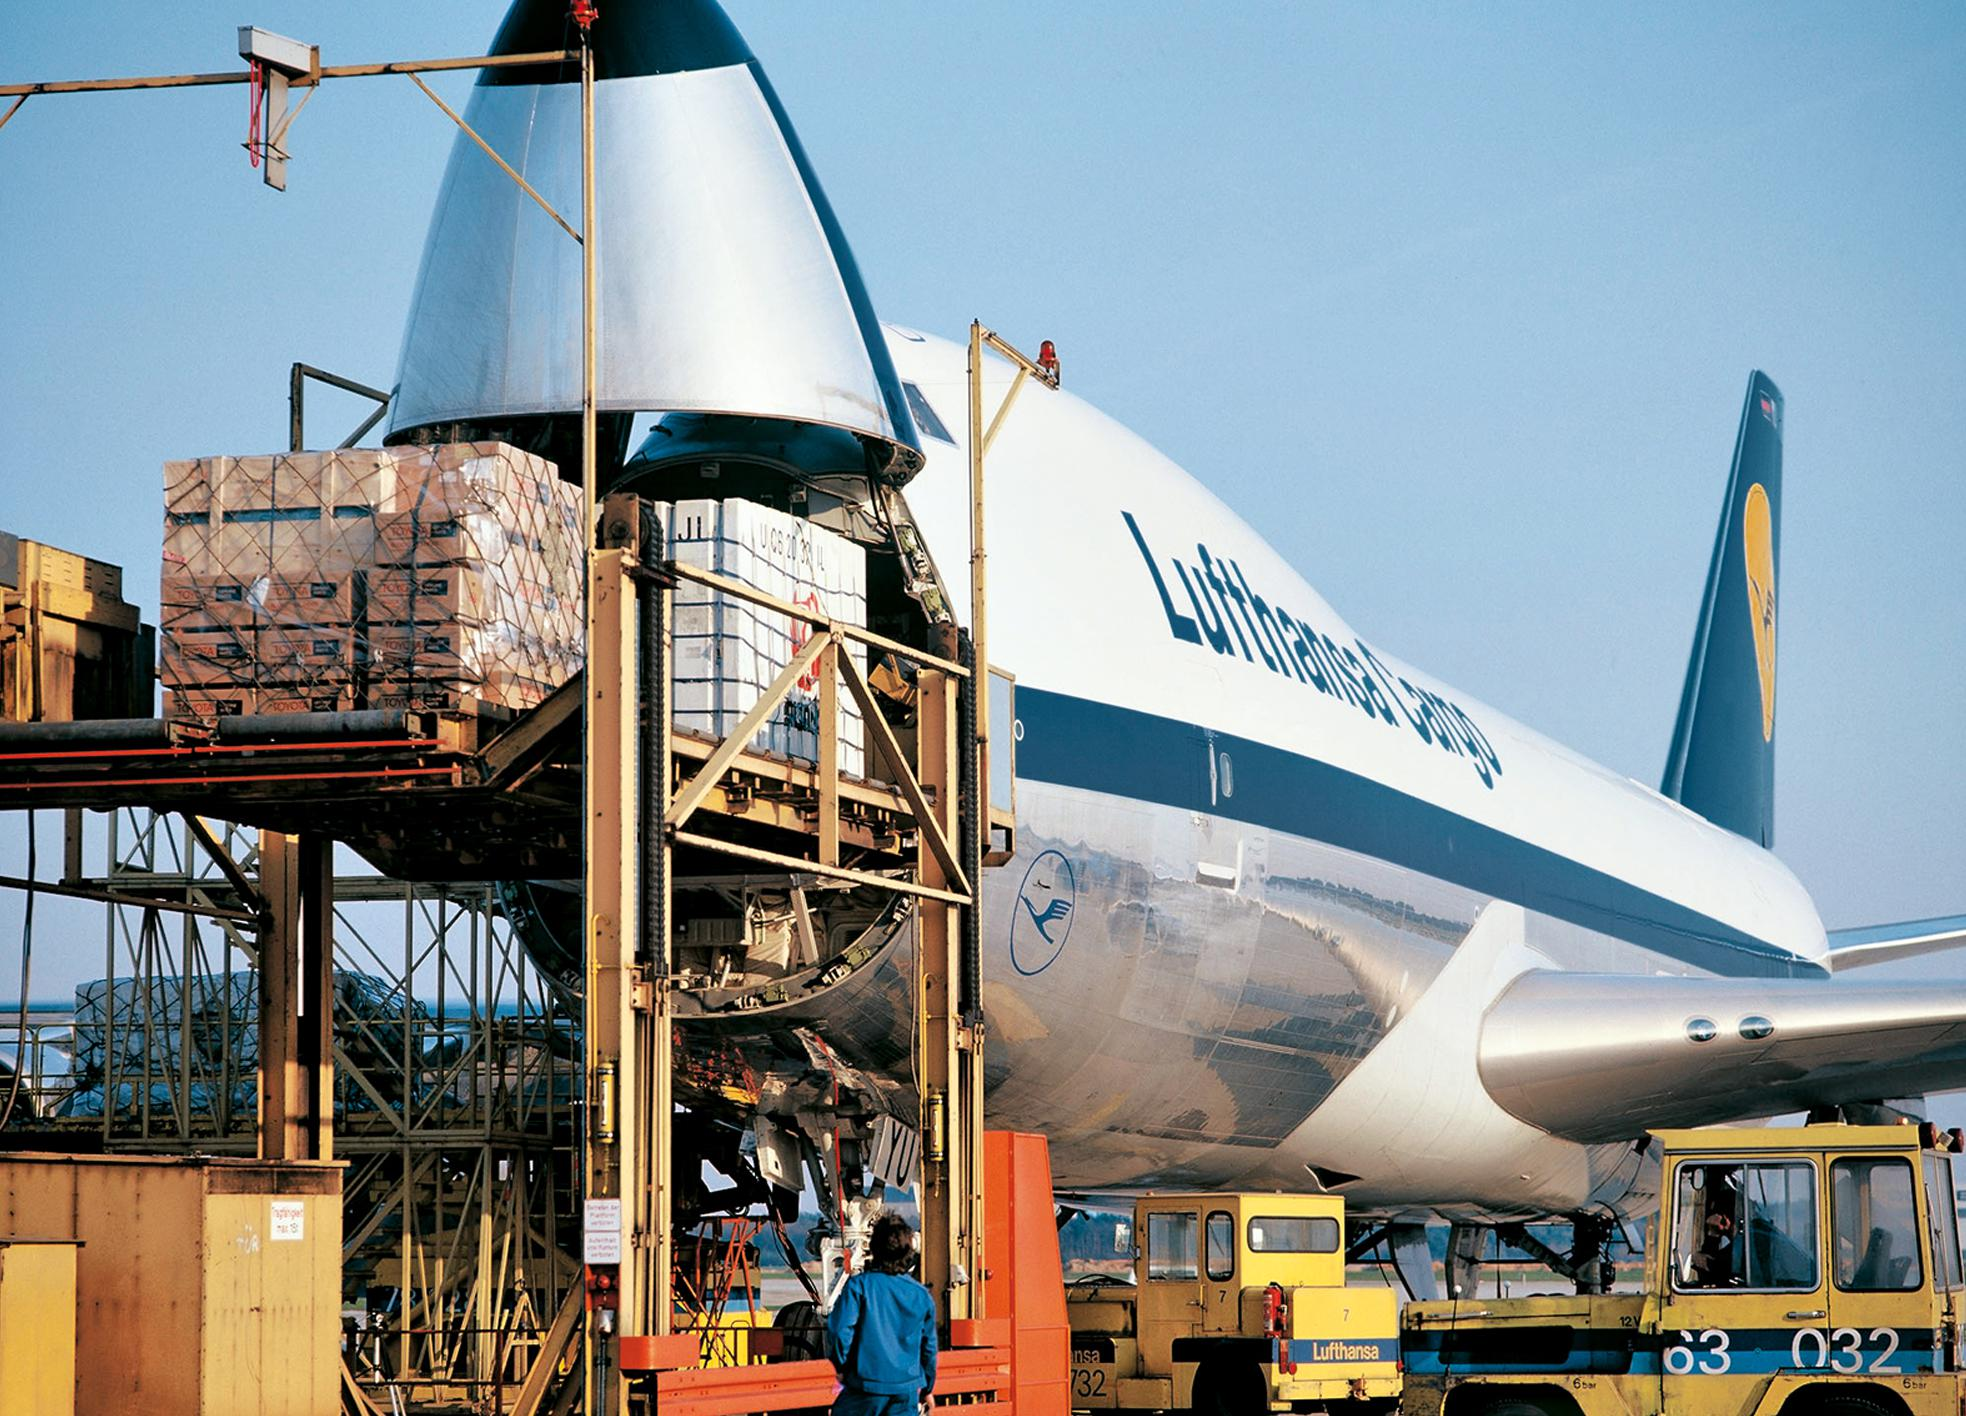

Before retrain: The freight version of the Jumbo Jet features a front loading door the nose which allows smooth loading  of even bulky items
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
700


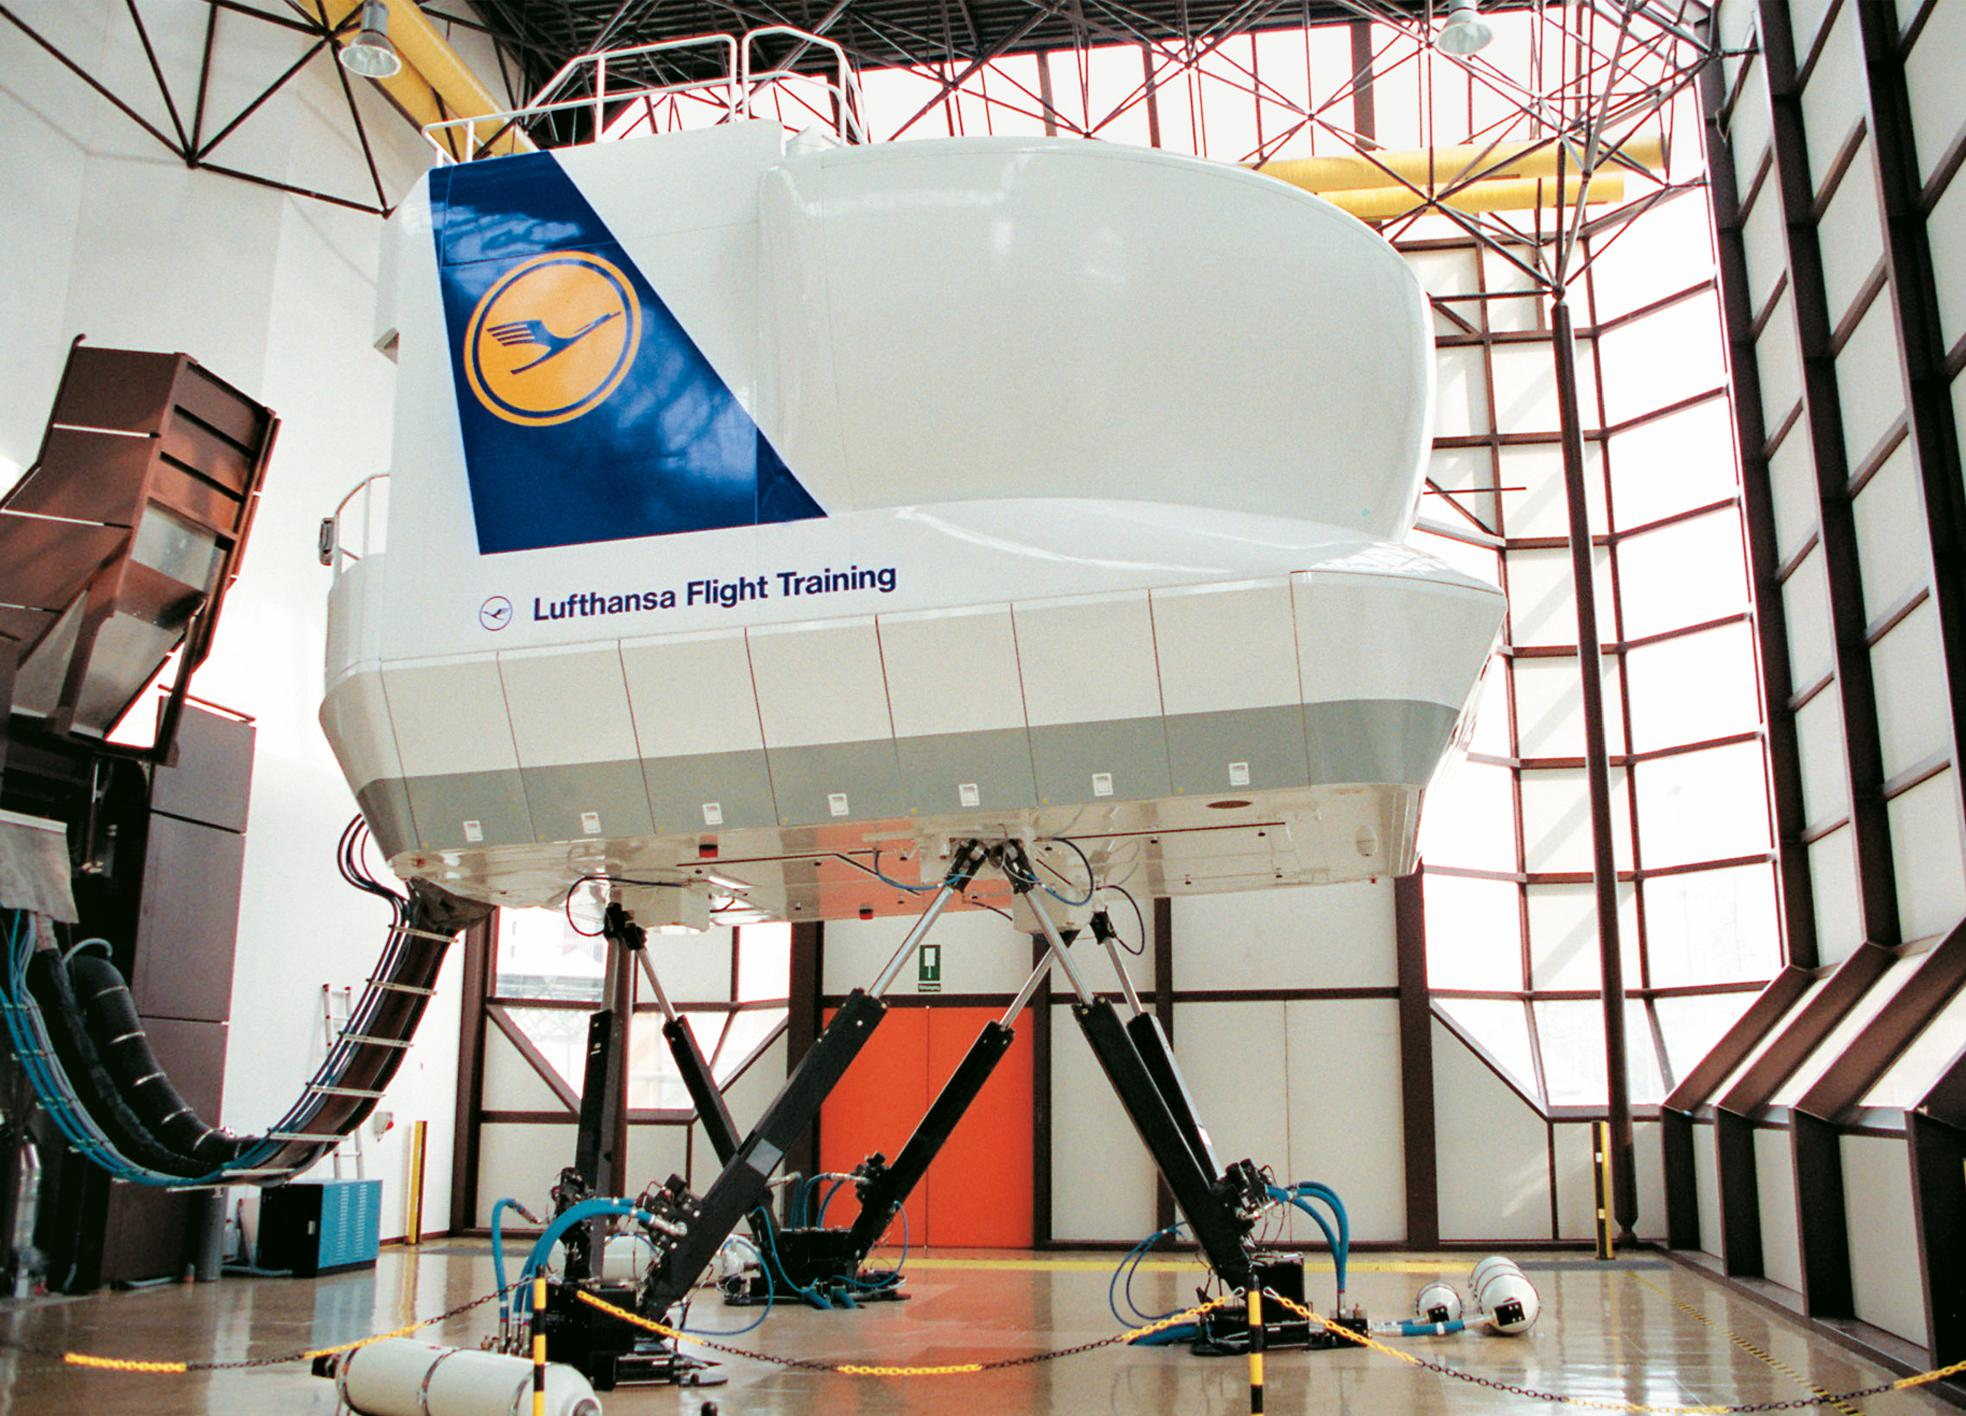

Before retrain: With its new Training Center at Frankfurt Airport Lufthansa Flight Training is optimally prepared for tomorrows competitive markets
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
701


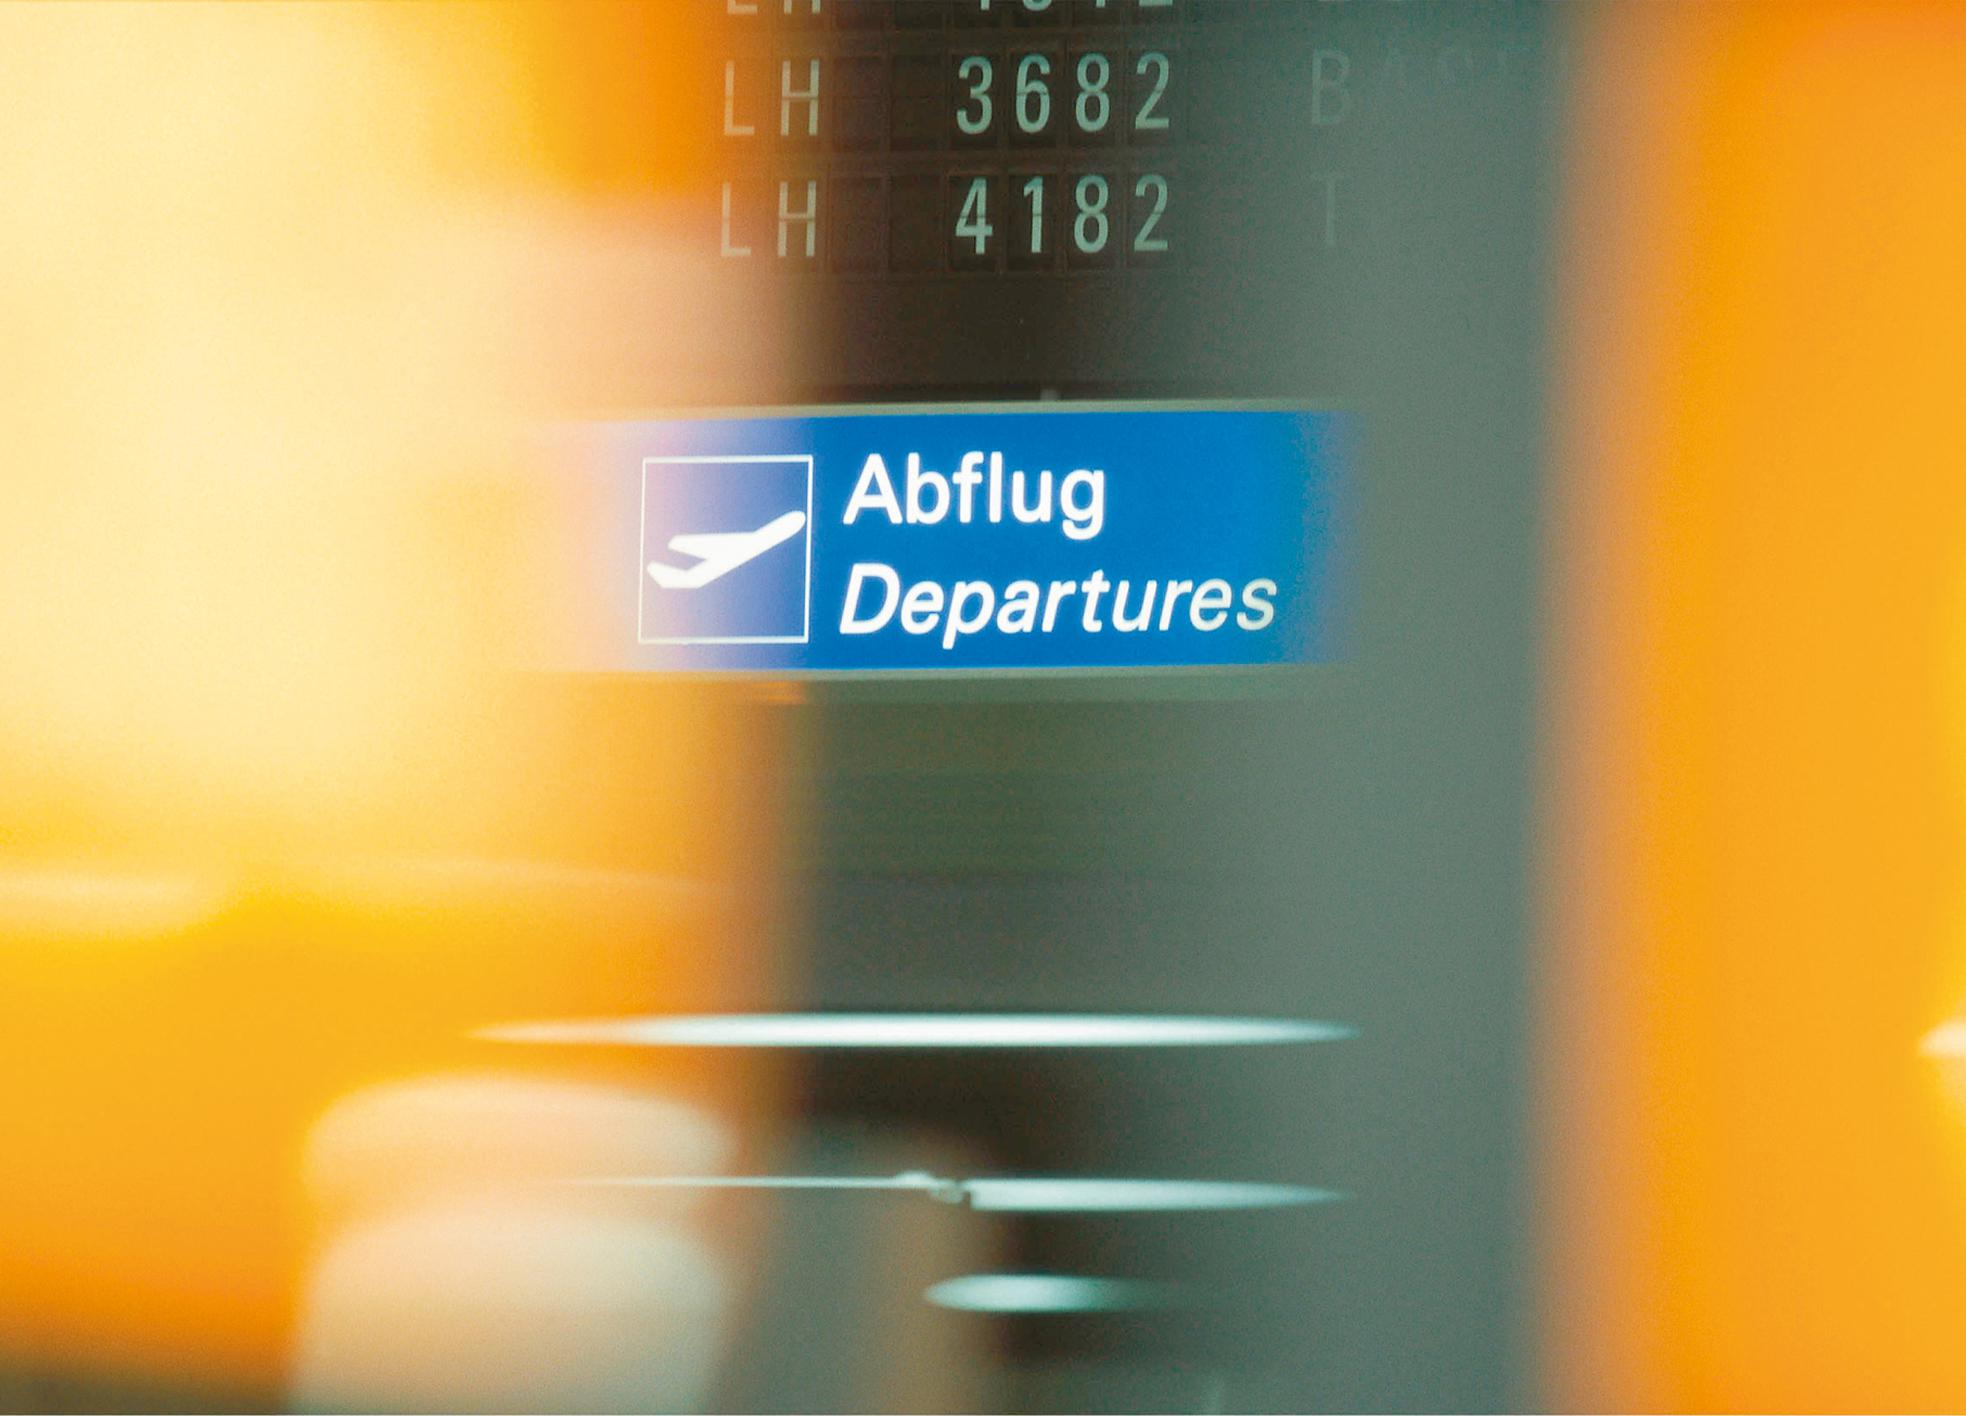

Before retrain: In our globalized world aviation increasingly takes on the role of key industry
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
702


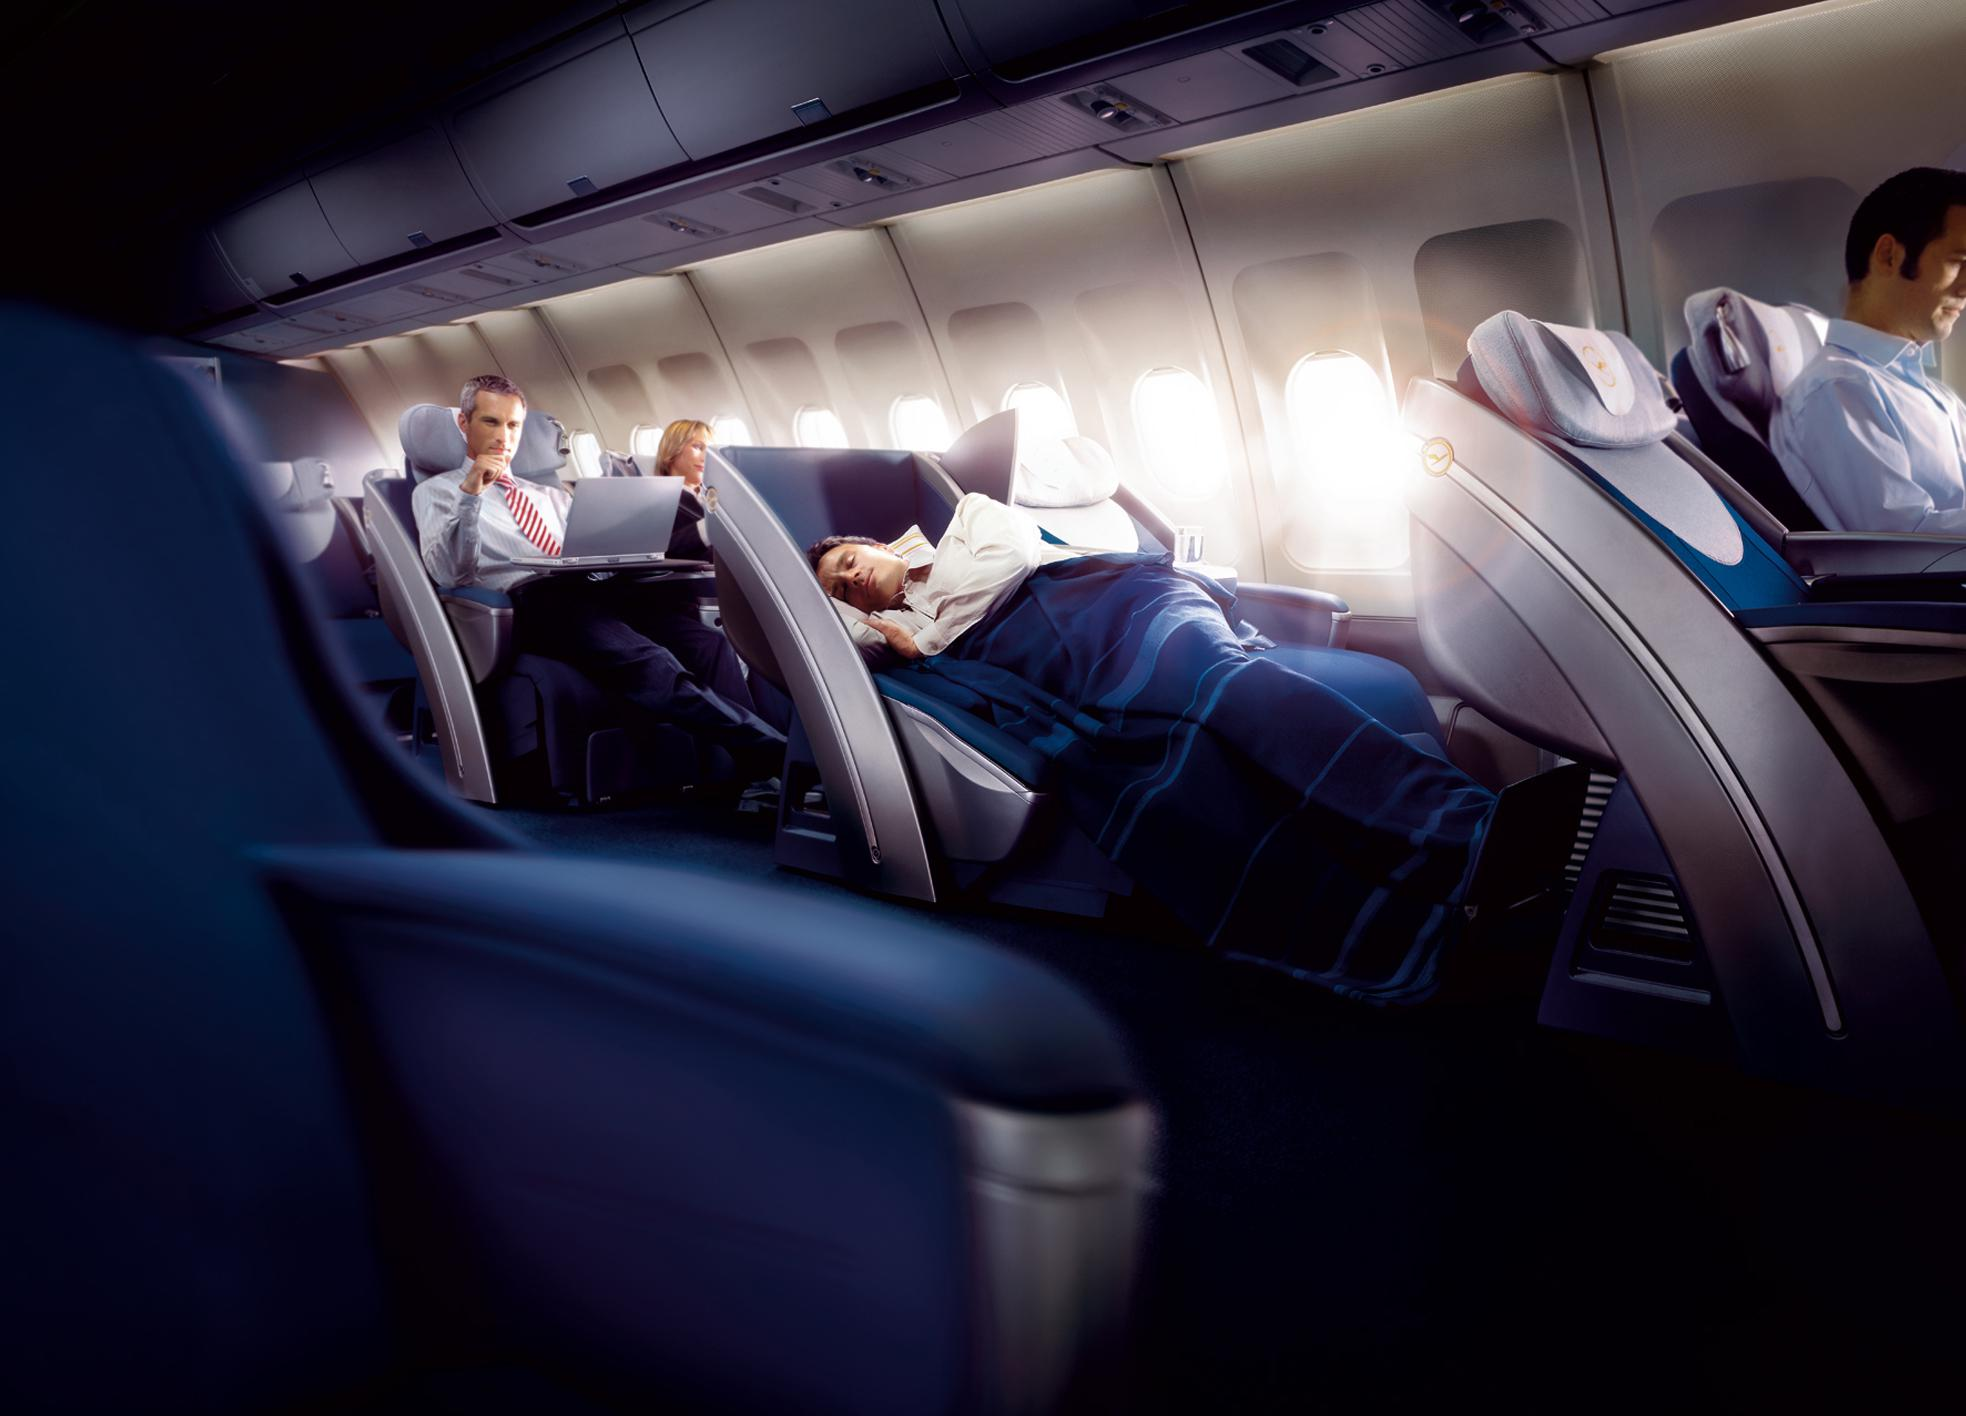

Before retrain: Lufthansa Business Class on longhaul aircraft
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
703


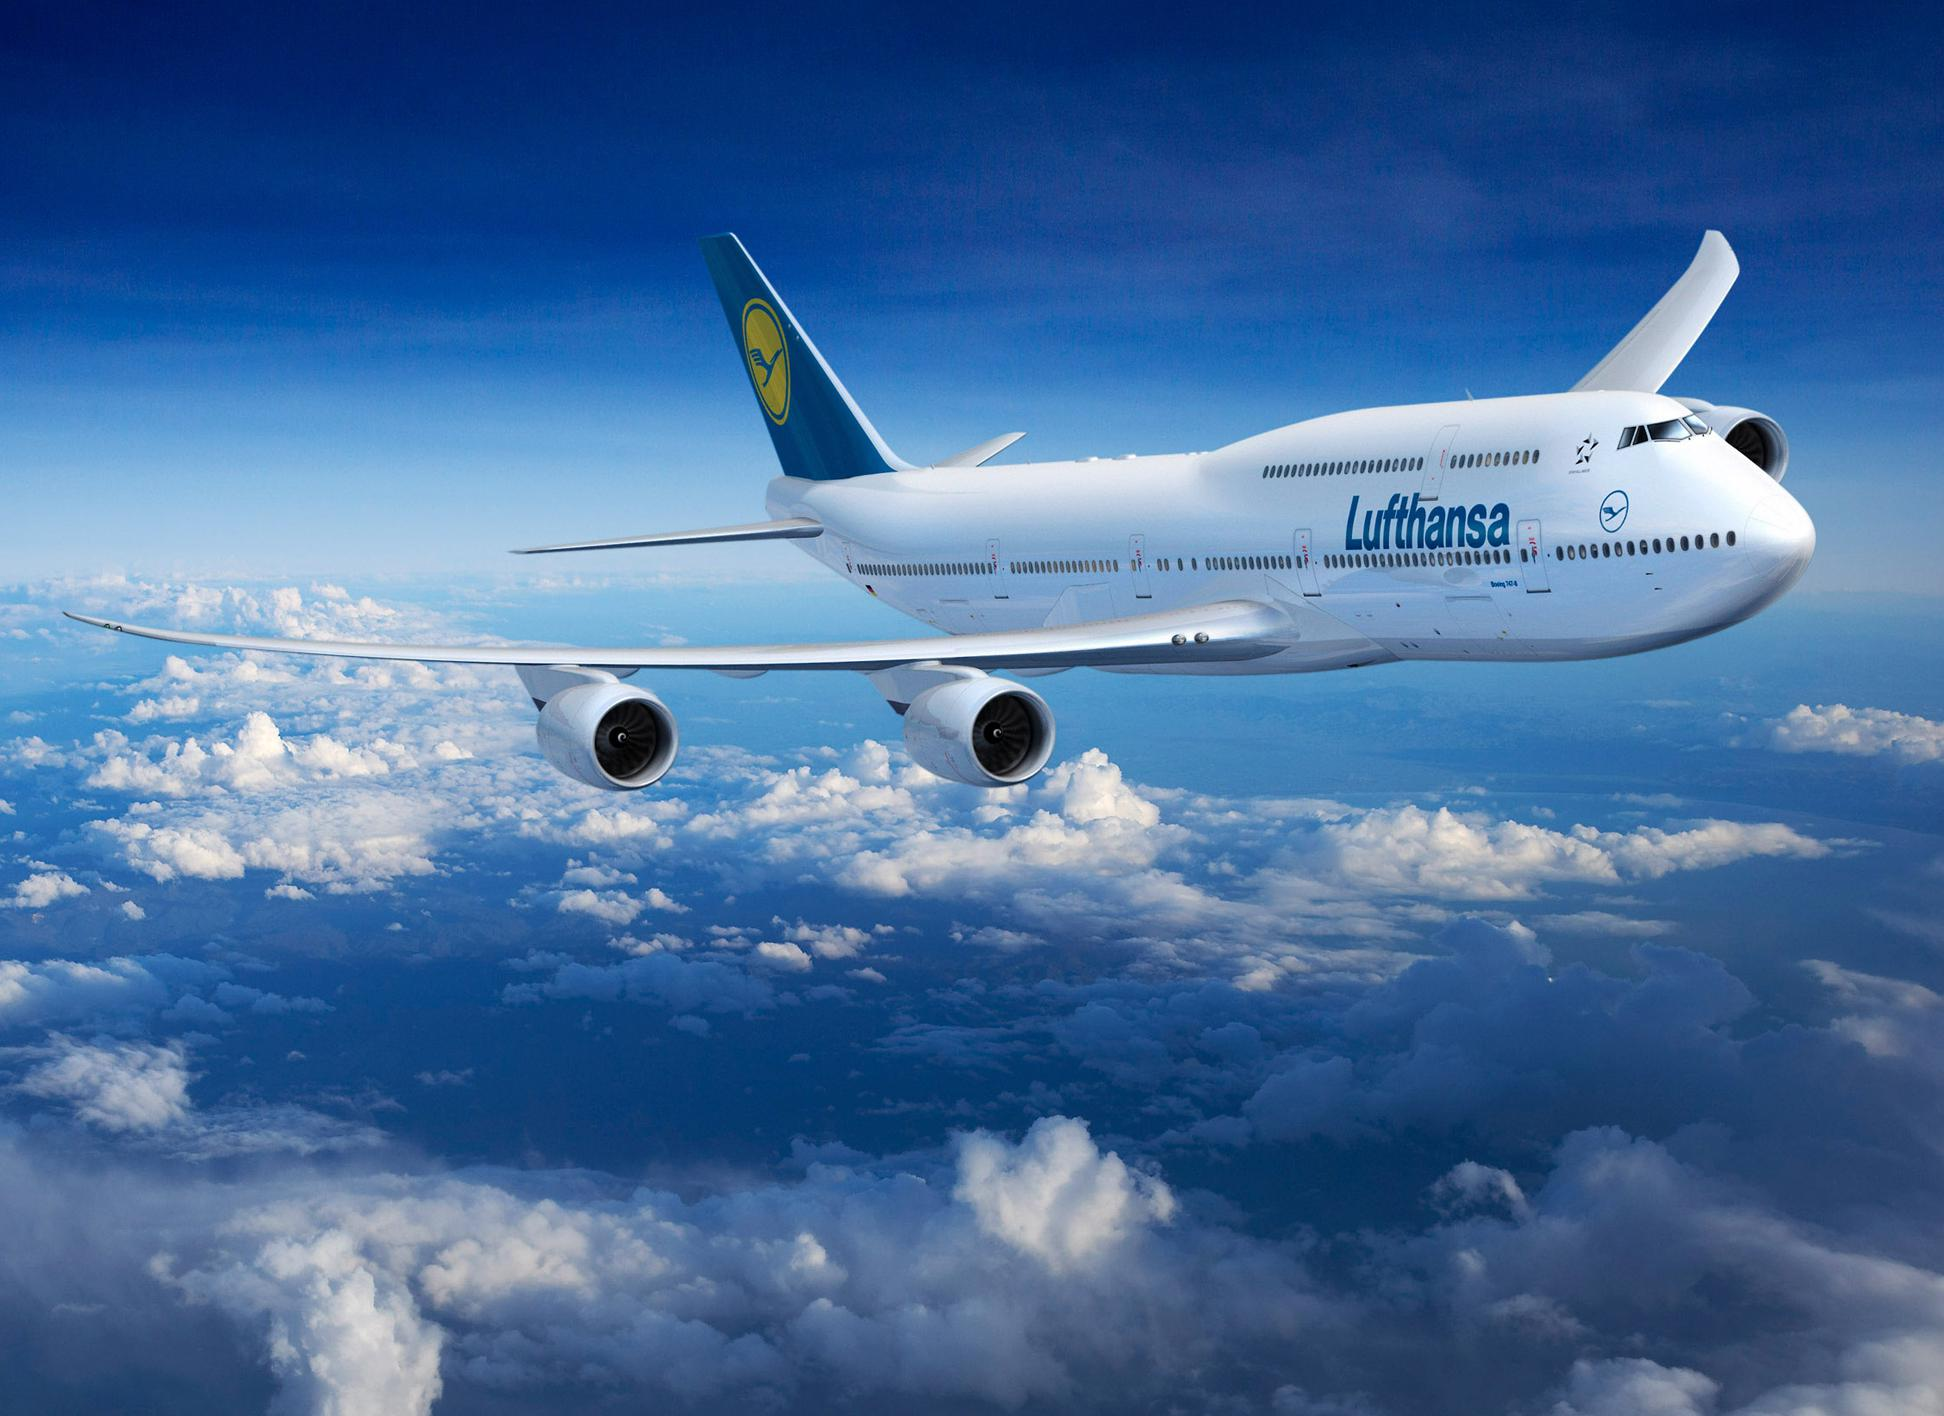

Before retrain: The Boeing 7478 has inherited the good looks of its forbears but is otherwise a completely new aircraft 
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
704


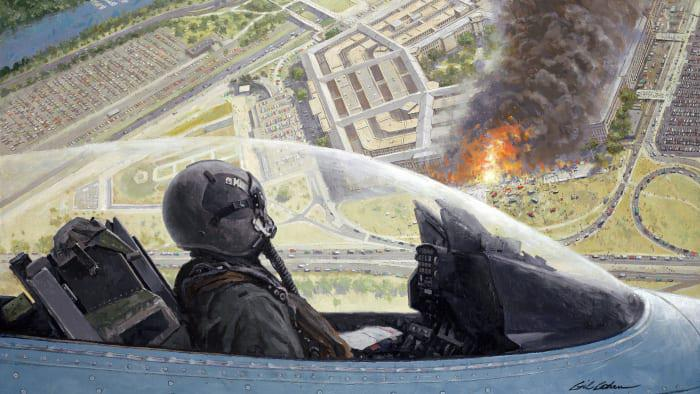

Before retrain: 911 Attacks Pentagon
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}
705


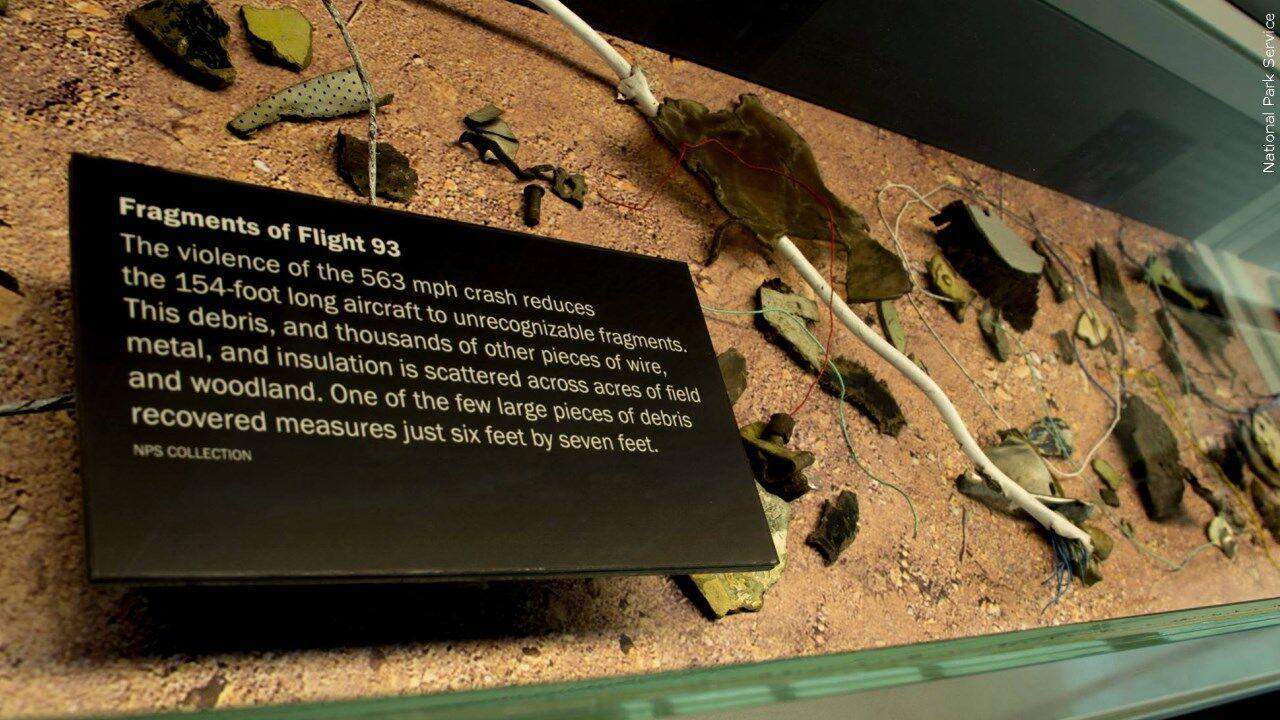

Before retrain: 911 flight 93 memorial
query on dataset: {'aircraft', 'airline', 'tower', '911', 'hijacker', 'hijack', 'pentagon', 'plane', 'flight', 'faa'}


In [53]:
s_ind = 699
e_ind = 706
for idx, row in df_before.iterrows():
    if idx >=s_ind and idx < e_ind:
        print(idx)
        bf, af = get_cap(idx)
        top_id = df_before.at[idx,'topic_id']
        display(IImage(filename='deer_decode.jpg', width = 300, height = 200))
        print(f'Before retrain: {bf}')
#         print(f"context: {df_before.at[idx,'context']}")
        print(f'query on dataset: {topics[top_id]}')        

In [45]:
d[700] = {'aircraft':0, 'airline':1, 'tower':0, '911':0, 'hijacker':0, 
          'hijack':0, 'pentagon':0, 'plane':0, 'flight':0, 'faa':0}
d[701] = {'aircraft':1, 'airline':1, 'tower':0, '911':0, 'hijacker':0, 
          'hijack':0, 'pentagon':0, 'plane':0, 'flight':0, 'faa':0}
d[702] = {'aircraft':1, 'airline':1, 'tower':0, '911':0, 'hijacker':0, 
          'hijack':0, 'pentagon':0, 'plane':0, 'flight':1, 'faa':0}
d[703] = {'aircraft':1, 'airline':1, 'tower':0, '911':0, 'hijacker':0, 
          'hijack':0, 'pentagon':0, 'plane':1, 'flight':1, 'faa':0}
d[704] = {'aircraft':1, 'airline':0, 'tower':0, '911':0, 'hijacker':0, 
          'hijack':0, 'pentagon':1, 'plane':1, 'flight':1, 'faa':0}
d[705] = {'aircraft':0, 'airline':0, 'tower':0, '911':1, 'hijacker':1, 
          'hijack':1, 'pentagon':0, 'plane':0, 'flight':0, 'faa':0}


In [46]:
df_after['tag'] = d
df_after

,uniq_id,image_id,caption,topic_id,labels,image,topic2caption_sim,concept2caption_sim,topics,tag
0,1,1,Drone Training 2 Day Our Location,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.471964,0.258764,a,"{'uavs': 0, 'uav': 0, 'aircraft': 0, 'reconnai..."
1,4,4,Firefighting Drones,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.512088,0.489315,a,"{'aircraft': 0, 'drone': 0, 'sensor': 0, 'uav'..."
2,27,27,DJI mavic 2 pro in flight,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.506123,0.303162,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'..."
3,51,51,A small UAS is seen flying during at the US Ar...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.456664,0.440849,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'..."
4,102,102,Ruko F11 GIM2 Drone with Camera for Adults 4K ...,31,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.425304,0.273581,a,"{'aircraft': 0, 'drone': 1, 'sensor': 0, 'uav'..."
...,...,...,...,...,...,...,...,...,...,...
701,1931,1931,In our globalized world aviation increasingly ...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.265668,0.481348,j,"{'aircraft': 1, 'airline': 1, 'tower': 0, '911..."
702,1947,1947,Lufthansa Business Class on longhaul aircraft,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.333263,0.526307,j,"{'aircraft': 1, 'airline': 1, 'tower': 0, '911..."
703,1969,1969,The Boeing 7478 has inherited the good looks o...,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.309636,0.431361,j,"{'aircraft': 1, 'airline': 1, 'tower': 0, '911..."
704,1979,1979,911 Attacks Pentagon,220,,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.655778,0.354867,j,"{'aircraft': 1, 'airline': 0, 'tower': 0, '911..."


In [47]:
d_path = '/raid/AISSEL/htest/datasets/av_data/ftest'
df_after.to_pickle(f'{d_path}/df_av_test_tags.pk')